# Маркетинговый анализ продвижения на рынок приложения Procrastinate Pro+
Заказчик исследования: разработчик приложения.

Цель исследования: оценка эффективности продвижения приложения, определение слабых мест в маркетинге и поиск путей их устранения.  

**Описание данных.**  
Исходные данные по визитам содержатся в файле visits_info_short.csv.
В таблице представлены следующие данные:
- User Id — уникальный идентификатор пользователя;
- Region — страна пользователя;
- Device — тип устройства пользователя;
- Channel — идентификатор источника перехода;
- Session Start — дата и время начала сессии;
- Session End — дата и время окончания сессии.

Исходные данные по заказам содержатся в файле orders_info_short.csv.
В таблице представлены следующие данные:
- User Id — уникальный идентификатор пользователя;
- Event Dt — дата и время покупки;
- Revenue — сумма заказа.

Исходные данные по затратам на рекламу содержатся в файле costs_info_short.csv.
В таблице представлены следующие данные:
- Channel — идентификатор рекламного источника;
- Dt — дата проведения рекламной кампании;
- Costs — расходы на эту кампанию.

Содержание исследования:  
1. [Общий анализ исходных таблиц](#open_file)  
    * [Импорт библиотек](#import)  
    * [Создание датафреймов](#read)  
    * [Общая информация](#df_inform)  
    * [Вывод](#first_conclusion)  
 
 
2. [Предобработка данных](#data_preprocessing)  
    * [Оптимизация типов данных](#category_type)  
    * [Обработка дубликатов](#dubl)  
    * [Вывод](#second_conclusion)   
    
    
3. [Анализ данных](#analysis)  
    * [Функции расчётов](#functions)  
    * [Пользовательские профили](#profiles)    
    * [Приток пользователей по странам](#region_trafic)  
    * [Приток пользователей по устройствам](#device_trafic)  
    * [Приток пользователей по источникам привлечения](#channel_trafic)  
    * [Вывод](#third_conclusion)  
    
    
4. [Маркетинг](#marketing)  
    * [Расходы на маркетинг](#cost_marketing)  
    * [Стоимость привлечения одного клиента (CAC)](#cac)  
    * [Вывод](#fourth_conclusion) 
    
    
5. [Окупаемость рекламы](#roi)  
    * [Общие LTV, CAC, ROI](#general_roi)  
    * [LTV, CAC, ROI по рекламным каналам](#channel_roi)  
    * [LTV, CAC, ROI по странам](#region_roi)  
    * [LTV, CAC, ROI по устройствам](#device_roi)  
    * [LTV, CAC, ROI по рекламным каналам для США](#channel_roi_usa)  
    * [LTV, CAC, ROI по устройствам для США](#device_roi_usa)  
    * [LTV, CAC, ROI по устройствам для проблемных каналов из США](#problem_channel_usa)  
    * [LTV, CAC, ROI по устройствам для по США без проблемных каналов](#no_problem_channel_usa)  
    * [LTV, CAC, ROI по рекламным каналам для Европы](#channel_roi_euro)  
    * [LTV, CAC, ROI по устройствам для Европы](#device_roi_euro)  
    * [Конверсия по рекламным каналам](#channel_conv)  
    * [Удержание по рекламным каналам](#channel_retention)  
    * [Конверсия и удержание по странам](#region_conv)  
    * [Конверсия по устройствам](#device_conv)  
    * [Удержание по устройствам](#device_retention)  
    * [Трафик проблемного канала по странам и устройствам](#bad_channel)  
    * [Вывод](#fifth_conclusion) 
    
    
4. [Общий вывод](#final)  
    * [Рекомендации](#recom) 

## Общий анализ исходных таблиц
<a id="open_file"></a>

***Импорт библиотек***
<a id="import"></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

***Создание датафреймов***
<a id="read"></a>

Создаем датафреймы из файлов с исходными данными:

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

visits.name = 'visits'
orders.name = 'orders'
costs.name = 'costs'

***Общая информация***
<a id="df_inform"></a>

Выводим общую информацию и первые пять строк датафреймов:

In [3]:
df_list = [visits, orders, costs]
for i in df_list:
    print(i.name)
    i.info(memory_usage='deep')
    print('______________________________________________________________________')
    print()

visits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 104.9 MB
______________________________________________________________________

orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5 MB
_____________________________________

In [4]:
for i in df_list:
    print(i.name)
    print(i.isna().sum())
    print('______________________________________________________________________')
    print()

visits
User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
______________________________________________________________________

orders
User Id     0
Event Dt    0
Revenue     0
dtype: int64
______________________________________________________________________

costs
dt         0
Channel    0
costs      0
dtype: int64
______________________________________________________________________



In [5]:
for i in df_list:
    print(i.name)
    display(i.sample(n=5, random_state=1))
    print('______________________________________________________________________')
    print()

visits


User Id         Region   Device  Channel        Session Start  \
211274  738535139711             UK  Android  organic  2019-05-09 15:06:53   
273259  680497695721        Germany  Android  LeapBob  2019-09-02 14:07:28   
205897  728963351414  United States      Mac  organic  2019-10-29 10:45:58   
297860  174899252198             UK       PC  LeapBob  2019-10-11 01:38:37   
169513  513791433815  United States  Android   TipTop  2019-10-02 15:05:58   

                Session End  
211274  2019-05-09 15:48:50  
273259  2019-09-02 14:11:43  
205897  2019-10-29 10:47:25  
297860  2019-10-11 01:47:59  
169513  2019-10-02 15:29:16

______________________________________________________________________

orders


User Id             Event Dt  Revenue
32012  419263491450  2019-07-30 23:59:07     4.99
38295  483568708610  2019-10-12 16:12:59     4.99
24544  448476047447  2019-10-16 06:11:23     4.99
29442  520659310653  2019-06-15 09:43:35     4.99
6270   680317225380  2019-07-05 13:01:50     4.99

______________________________________________________________________

costs


dt             Channel    costs
1462  2019-05-23      WahooNetBanner    7.200
510   2019-09-28      RocketSuperAds   11.375
612   2019-07-12              TipTop  288.600
1322  2019-07-02  OppleCreativeMedia   14.750
993   2019-08-02          AdNonSense   26.250

______________________________________________________________________



In [6]:
for i in df_list:
    print(i.name)
    print()
    try:
        print(i.describe(include='object').T)
    except:
        print('Нет данных')
    print()
    try:
        print(i.describe().T)
    except:
        print('Нет данных')
    print('______________________________________________________________________')
    print()

visits

                count  unique                  top    freq
Region         309901       4        United States  207327
Device         309901       4               iPhone  112603
Channel        309901      11              organic  107760
Session Start  309901  306813  2019-10-02 09:50:32       3
Session End    309901  306793  2019-08-27 20:15:44       3

            count          mean           std       min           25%  \
User Id  309901.0  4.997664e+11  2.887899e+11  599326.0  2.493691e+11   

                  50%           75%           max  
User Id  4.989906e+11  7.495211e+11  9.999996e+11  
______________________________________________________________________

orders

          count unique                  top freq
Event Dt  40212  40163  2019-09-06 04:03:39    2

           count          mean           std        min           25%  \
User Id  40212.0  4.990295e+11  2.860937e+11  599326.00  2.511324e+11   
Revenue  40212.0  5.370608e+00  3.454208e+00       4.99  4.99

***Вывод:***
<a id="first_conclusion"></a>
1. В таблице visits 309901 строк и 6 полей. Поле User Id имеет тип int64, остальные - object. Размер таблицы - 104.9 MB.
2. В таблице orders 40212 строк и 3 поля. Поле User Id имеет тип int64, Event Dt - тип object, Revenue тип - float64. Размер таблицы - 3.5 MB.
3. В таблице costs 1800 строк и 3 поля. Поле costs имеет тип float64, остальные - object. Размер таблицы - 251.5 KB.
4. В названиях полей используются символы верхнего и нижнего регистра.
5. Пропущенных значений в таблицах нет.

## Предобработка данных
<a id="data_preprocessing"></a>

Приводим названия полей к единому формату:

In [7]:
for i in df_list:
    i.columns = [x.lower().replace(' ', '_') for x in i.columns]

***Оптимизация типов данных***
<a id="category_type"></a>

Определяем процент уникальных значений данных в полях, которые можно отнести к категориальным. Если он менее 50%, заменяем тип поля на "categoty":

In [8]:
def func(tab, fields, name):
    for i in fields:
        tab[i] = tab[i].apply(lambda x: x.lower()) 
    percent_list = []                                                           #Список для полей у которых будет изменен тип
    for i in fields:                                                     #Цикл по полям с категориальными значениями
        percent = len(tab[i].unique()) / len(tab)                     #процент уникальных значений
        print('Процент уникальных значений {} ({}) от общего количества = {:0.3%}'
            .format(i, name, percent))
        if percent < 50:                                                        #Если процент уникальных значений < 50
            percent_list.append(i)                                              #Добавляем поле в список для изменения типа
        
    if len(percent_list) != 0:                                                  #Если список не пустой
        for i in percent_list:                                                  #Проходим циклом по списку полей для изменения типа
            tab = tab.astype({i : 'category'})                        #меняем тип поля на "category"
#    display(tab.info())
    return tab

In [9]:
visits_list = ['region', 'device', 'channel']
visits = func(visits, visits_list, 'visits')
costs_list = ['channel']
costs = func(costs, costs_list, 'costs')
df_list = [visits, orders, costs]

Процент уникальных значений region (visits) от общего количества = 0.001%
Процент уникальных значений device (visits) от общего количества = 0.001%
Процент уникальных значений channel (visits) от общего количества = 0.004%
Процент уникальных значений channel (costs) от общего количества = 0.556%


Приводим формат полей, содержащих даты, к формату datetime:

In [10]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

***Обработка дубликатов***
<a id="dubl"></a>

Задаем границу доли дубликатов, выше которой данные не удаляем:

In [11]:
border = 0.02

Удаление дубликатов visits:

In [12]:
visits_fraction = visits.duplicated().sum() / visits.shape[0]
if visits_fraction <= border:
    visits = (
        visits
        .drop_duplicates(subset=list(visits.columns))      #Удалиение дубликатов по 5 полям
        .reset_index()                                                                             #Сброс индексов
    )
else:
    print('Количество дубликатов превышает допустимый предел. Доля дубликатов - {:.2%}.'.format(visits_fraction))
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   index          309901 non-null  int64         
 1   user_id        309901 non-null  int64         
 2   region         309901 non-null  category      
 3   device         309901 non-null  category      
 4   channel        309901 non-null  category      
 5   session_start  309901 non-null  datetime64[ns]
 6   session_end    309901 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](2), int64(2)
memory usage: 10.3 MB


Удаление дубликатов orders:

In [13]:
orders_fraction = orders.duplicated().sum() / orders.shape[0]
if orders_fraction <= border:
    orders = (
        orders
        .drop_duplicates(subset=list(orders.columns))      #Удалиение дубликатов по 5 полям
        .reset_index()                                                                             #Сброс индексов
    )
else:
    print('Количество дубликатов превышает допустимый предел. Доля дубликатов - {:.2%}.'.format(visits_fraction))
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     40212 non-null  int64         
 1   user_id   40212 non-null  int64         
 2   event_dt  40212 non-null  datetime64[ns]
 3   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.2 MB


Удаление дубликатов costs:

In [14]:
costs_fraction = costs.duplicated().sum() / costs.shape[0]
if costs_fraction <= border:
    costs = (
        costs
        .drop_duplicates(subset=list(costs.columns))      #Удалиение дубликатов по 5 полям
        .reset_index()                                                                             #Сброс индексов
    )
else:
    print('Количество дубликатов превышает допустимый предел. Доля дубликатов - {:.2%}.'.format(visits_fraction))
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   index    1800 non-null   int64   
 1   dt       1800 non-null   object  
 2   channel  1800 non-null   category
 3   costs    1800 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 101.3 KB


***Вывод:***
<a id="second_conclusion"></a>
1. Наименования полей приведены к единому регистру, пробелы заменены на символ "_".
2. Оптимизированы типы данных.
3. Размер таблицы visits уменьшен с 104.9 MB до 8.0 MB.
4. Размер таблицы orders уменьшен с 3.5 MB до 942.6 KB.
5. Размер таблицы orders уменьшен с 251.5 KB до 87.2 KB.

## Анализ данных
<a id="analysis"></a>

Задаем дату и горизонт исследования:

In [15]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

### Функции расчётов
<a id="functions"></a>

In [16]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    first_time = profiles['dt'].min()
    last_time = profiles['dt'].max()
    return profiles, first_time, last_time

In [17]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [18]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [19]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [20]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [21]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).fillna(0)
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [22]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [23]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Пользовательские профили
<a id="profiles"></a>

***Пользовательские профили***

Создаем пользовательские профили, определяем минимальную и максимальную даты привлечения пользователей:

In [24]:
profiles, first_time, last_time = get_profiles(visits, orders, costs)
display(profiles.head(5))
print('Минимальная дата привлечения пользователей: {}'.format(first_time))
print('Максимальная дата привлечения пользователей: {}'.format(last_time))

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    faceboom     mac  united states   
1   4919697 2019-07-09 12:46:07    faceboom  iphone  united states   
2   6085896 2019-10-01 09:58:33     organic  iphone         france   
3  22593348 2019-08-22 21:35:48  adnonsense      pc        germany   
4  31989216 2019-10-02 00:07:44     yrabbit  iphone  united states   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


***Приток пользователей по странам***
<a id="region_trafic"></a>

In [25]:
visits_region = (
    profiles.groupby('region')
    .agg({'user_id' : 'nunique', 'payer' : 'sum'})
    .assign(fraction = lambda x: x['payer'] / x['user_id'])
    .rename(columns = {'user_id' : 'visits'})
    .sort_values(by='fraction', ascending = False)
)
display(visits_region)
print('Наибольший трафик - из "{}": {}.'.format(visits_region[visits_region['visits'] == visits_region['visits'].max()].index[0],
                                             visits_region['visits'].max()))
print('Наименьший трафик - из "{}": {}.'.format(visits_region[visits_region['visits'] == visits_region['visits'].min()].index[0],
                                             visits_region['visits'].min()))
print('Наибольшее количество покупателей - из "{}": {}.'.format(visits_region[visits_region['payer'] == visits_region['payer'].max()].index[0],
                                             visits_region['payer'].max()))
print('Наименьшее количество покупателей - из "{}": {}.'.format(visits_region[visits_region['payer'] == visits_region['payer'].min()].index[0],
                                             visits_region['payer'].min()))
print('Наибольшая доля покупателей - из "{}": {:.3f}.'.format(visits_region[visits_region['fraction'] == visits_region['fraction'].max()].index[0],
                                             visits_region['fraction'].max()))
print('Наименьшая доля покупателей - из "{}": {:.3f}.'.format(visits_region[visits_region['fraction'] == visits_region['fraction'].min()].index[0],
                                             visits_region['fraction'].min()))

visits  payer  fraction
region                                
united states  100002   6902  0.069019
germany         14981    616  0.041119
uk              17575    700  0.039829
france          17450    663  0.037994

Наибольший трафик - из "united states": 100002.
Наименьший трафик - из "germany": 14981.
Наибольшее количество покупателей - из "united states": 6902.
Наименьшее количество покупателей - из "germany": 616.
Наибольшая доля покупателей - из "united states": 0.069.
Наименьшая доля покупателей - из "france": 0.038.


***Приток пользователей по устройствам***
<a id="device_trafic"></a>

In [26]:
visits_device = (
    profiles.groupby('device')
    .agg({'user_id' : 'nunique', 'payer' : 'sum'})
    .assign(fraction = lambda x: x['payer'] / x['user_id'])
    .rename(columns = {'user_id' : 'visits'})
    .sort_values(by='fraction', ascending = False)
)
display(visits_device)
print('Наибольший трафик - из устройств "{}": {}.'.format(visits_device[visits_device['visits'] == visits_device['visits'].max()].index[0],
                                             visits_device['visits'].max()))
print('Наименьший трафик - из устройств "{}": {}.'.format(visits_device[visits_device['visits'] == visits_device['visits'].min()].index[0],
                                             visits_device['visits'].min()))
print('Наибольшее количество покупателей - из устройств "{}": {}.'.format(visits_device[visits_device['payer'] == visits_device['payer'].max()].index[0],
                                             visits_device['payer'].max()))
print('Наименьшее количество покупателей - из устройств "{}": {}.'.format(visits_device[visits_device['payer'] == visits_device['payer'].min()].index[0],
                                             visits_device['payer'].min()))
print('Наибольшая доля покупателей - из устройств "{}": {:.3f}.'.format(visits_device[visits_device['fraction'] == visits_device['fraction'].max()].index[0],
                                             visits_device['fraction'].max()))
print('Наименьшая доля покупателей - из устройств "{}": {:.3f}.'.format(visits_device[visits_device['fraction'] == visits_device['fraction'].min()].index[0],
                                             visits_device['fraction'].min()))

visits  payer  fraction
device                          
mac       30042   1912  0.063644
iphone    54479   3382  0.062079
android   35032   2050  0.058518
pc        30455   1537  0.050468

Наибольший трафик - из устройств "iphone": 54479.
Наименьший трафик - из устройств "mac": 30042.
Наибольшее количество покупателей - из устройств "iphone": 3382.
Наименьшее количество покупателей - из устройств "pc": 1537.
Наибольшая доля покупателей - из устройств "mac": 0.064.
Наименьшая доля покупателей - из устройств "pc": 0.050.


***Приток пользователей по источникам привлечения***
<a id="channel_trafic"></a>

In [27]:
visits_channel = (
    profiles.groupby('channel')
    .agg({'user_id' : 'nunique', 'payer' : 'sum'})
    .assign(fraction = lambda x: x['payer'] / x['user_id'])
    .rename(columns = {'user_id' : 'visits'})
    .sort_values(by='fraction', ascending = False)
)
display(visits_channel)
print('Наибольший трафик - из канала "{}": {}.'.format(visits_channel[visits_channel['visits'] == visits_channel['visits'].max()].index[0],
                                             visits_channel['visits'].max()))
print('Наименьший трафик - из канала "{}": {}.'.format(visits_channel[visits_channel['visits'] == visits_channel['visits'].min()].index[0],
                                             visits_channel['visits'].min()))
print('Наибольшее количество покупателей - из канала "{}": {}.'.format(visits_channel[visits_channel['payer'] == visits_channel['payer'].max()].index[0],
                                             visits_channel['payer'].max()))
print('Наименьшее количество покупателей - из канала "{}": {}.'.format(visits_channel[visits_channel['payer'] == visits_channel['payer'].min()].index[0],
                                             visits_channel['payer'].min()))
print('Наибольшая доля покупателей - из канала "{}": {:.3f}.'.format(visits_channel[visits_channel['fraction'] == visits_channel['fraction'].max()].index[0],
                                             visits_channel['fraction'].max()))
print('Наименьшая доля покупателей - из канала "{}": {:.3f}.'.format(visits_channel[visits_channel['fraction'] == visits_channel['fraction'].min()].index[0],
                                             visits_channel['fraction'].min()))

visits  payer  fraction
channel                                    
faceboom             29144   3557  0.122049
adnonsense            3880    440  0.113402
lambdamediaads        2149    225  0.104700
tiptop               19561   1878  0.096007
rocketsuperads        4448    352  0.079137
wahoonetbanner        8553    453  0.052964
yrabbit               4312    165  0.038265
mediatornado          4364    156  0.035747
leapbob               8553    262  0.030633
opplecreativemedia    8605    233  0.027077
organic              56439   1160  0.020553

Наибольший трафик - из канала "organic": 56439.
Наименьший трафик - из канала "lambdamediaads": 2149.
Наибольшее количество покупателей - из канала "faceboom": 3557.
Наименьшее количество покупателей - из канала "mediatornado": 156.
Наибольшая доля покупателей - из канала "faceboom": 0.122.
Наименьшая доля покупателей - из канала "organic": 0.021.


***Вывод:***  
<a id="third_conclusion"></a>
Трафик по регионам:
- наибольший трафик - из США: 100002;
- наименьший трафик - из Германии: 14981;
- наибольшее количество покупателей - из США: 6902;
- наименьшее количество покупателей - из Германии: 616;
- наибольшая доля покупателей - из США: 0.069;
- наименьшая доля покупателей - из Франции: 0.038.

Трафик по устройствам:
- наибольший трафик - из устройств iphone: 54479;
- наименьший трафик - из устройств mac: 30042;
- наибольшее количество покупателей - из устройств iphone: 3382;
- наименьшее количество покупателей - из устройств pc: 1537;
- наибольшая доля покупателей - из устройств mac: 0.064;
- наименьшая доля покупателей - из устройств pc: 0.050.

Трафик по каналам привлечения клиентов:
- наибольший трафик - из канала "organic": 56439;
- наименьший трафик - из канала "lambdamediaads": 2149;
- наибольшее количество покупателей - из канала "faceboom": 3557;
- наименьшее количество покупателей - из канала "mediatornado": 156;
- наибольшая доля покупателей - из канала "faceboom": 0.122;
- наименьшая доля покупателей - из канала "organic": 0.021.

### Маркетинг
<a id="marketing"></a>

Поскольку цель исследования - оценка маркетинговой компании, убираем из исследования источник бесплатного трафика:

In [28]:
profiles_pay = profiles.query('channel != "organic"')

***Расходы на маркетинг***
<a id="cost_marketing"></a>

Вычисляем общую сумму расходов на маркетинг:

In [29]:
cost = costs['costs'].sum()
print('Общая сумма расходов на маркетинг: {}'.format(int(cost)))

Общая сумма расходов на маркетинг: 105497


Находим распределение расходов на маркетинг по источникам привлечения клиентов:

In [30]:
channel_costs = (
    costs.groupby('channel')['costs']
    .sum()
    .sort_values(ascending = False)
    .reset_index()
)
channel_costs

channel     costs
0              tiptop  54751.30
1            faceboom  32445.60
2      wahoonetbanner   5151.00
3          adnonsense   3911.25
4  opplecreativemedia   2151.25
5      rocketsuperads   1833.00
6             leapbob   1797.60
7      lambdamediaads   1557.60
8        mediatornado    954.48
9             yrabbit    944.22

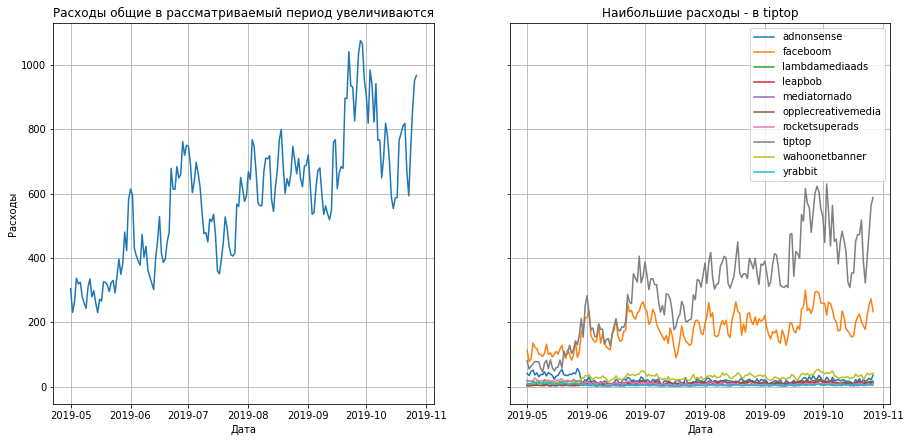

In [31]:
total_costs = costs.groupby('dt')['costs'].sum()
ax1 = plt.subplot(1, 2, 1)
total_costs.plot(grid=True, ax=ax1, figsize=(15, 7))
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.title('Расходы общие в рассматриваемый период увеличиваются')

channels_costs = costs.pivot_table(index='channel', columns='dt', values='costs', aggfunc='sum')
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
channels_costs.T.plot(grid=True, ax=ax2, figsize=(15, 7))
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.title('Наибольшие расходы - в tiptop')
plt.show()

plt.show()

#print('Кривая общих расходов имеет восходящий тренд. За рассматриваемый период затраты увеличиваются с {:.2f} {} до максимального значения {:.2f} {}. Рост обусловлен увеличением расходов на каналы привлечения клиентов "tiptop" и "faceboom". Затраты на остальные каналы в исследуемый период колеблются в пределах {}-{}.'.format(total_costs.min(), total_costs[total_costs == total_costs.min()].index[0],
#     total_costs.max(), total_costs[total_costs == total_costs.max()].index[0],
#     sorted(channels_costs.T.drop(columns=['faceboom', 'tiptop']).min())[0],
#     sorted(channels_costs.T.drop(columns=['faceboom', 'tiptop']).max())[-1]))

Максимальные затраты на привлечение клиентов приходятся на каналы tiptop (54751.3) и faceboom (32445.6).
Кривая общих расходов имеет восходящий тренд. Рост обусловлен увеличением расходов на каналы привлечения клиентов "tiptop" и "faceboom".

***Расчёт CAC***
<a id="cac"></a>

Среднее CAC для всего проекта:

In [32]:
CAC_mean = profiles_pay['acquisition_cost'].mean()
print('Среднее CAC для всего проекта: {:.2f}'.format(CAC_mean))

Среднее CAC для всего проекта: 1.13


Среднее CAC по источникам:

In [33]:
channel_CAC_mean = (
    profiles_pay.groupby('channel')['acquisition_cost'].mean()
    .sort_values(ascending = False)
    .reset_index()
)
channel_CAC_mean

channel  acquisition_cost
0              tiptop          2.799003
1            faceboom          1.113286
2          adnonsense          1.008054
3      lambdamediaads          0.724802
4      wahoonetbanner          0.602245
5      rocketsuperads          0.412095
6  opplecreativemedia          0.250000
7             yrabbit          0.218975
8        mediatornado          0.218717
9             leapbob          0.210172

Динамика среднего CAC по каналам:

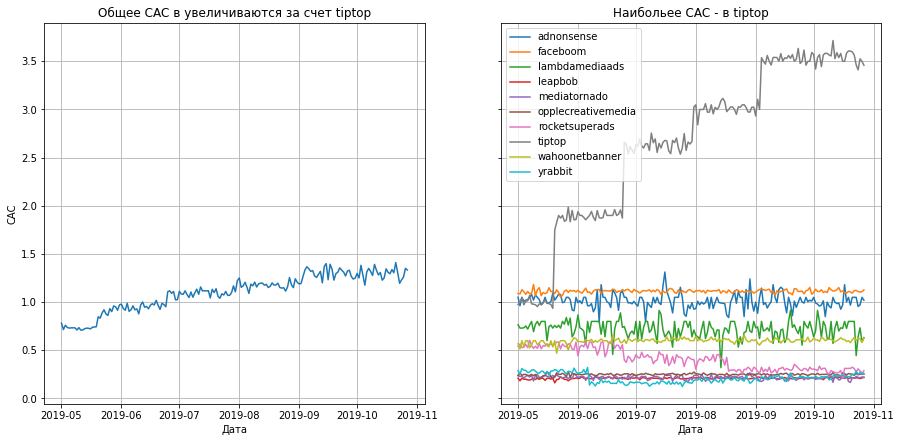

In [34]:
total_cac = profiles_pay.groupby('dt')['acquisition_cost'].mean()
ax1 = plt.subplot(1, 2, 1)
total_cac.plot(grid=True, ax=ax1, figsize=(15, 7))
plt.xlabel('Дата')
plt.ylabel('CAC')
plt.title('Общее CAC в увеличиваются за счет tiptop')

channels_cac = profiles_pay.pivot_table(index='channel', columns='dt', values='acquisition_cost', aggfunc='mean')
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
channels_cac.T.plot(grid=True, ax=ax2, figsize=(15, 7))
plt.legend()
plt.xlabel('Дата')
plt.ylabel('CAC')
plt.title('Наибольее CAC - в tiptop')
plt.show()

tmp = channels_cac.T
top_cac = tmp.max()
top_channel_cac = top_cac[top_cac == top_cac.max()].index[0]
bad_channal = top_cac[top_cac == top_cac.max()].index[0]

Среднее CAC для всего проекта - 1.13.  
Лидеры по средней стоимости привлечения одного клиента каналы:
- tiptop - 2.80;
- faceboom - 1.11;
- adnonsense - 1.01.  

Средняя стоимость привлечения одного клиента имеет восходящий тренд. Рост обусловлен увеличением средней стоимости привлечения клиентов по каналу "tiptop". Затраты на остальные каналы в исследуемый период меняются незначительно.

***Вывод:***  
<a id="fourth_conclusion"></a>
Кривая общих расходов имеет восходящий тренд. Рост обусловлен увеличением расходов на каналы привлечения клиентов "tiptop" и "faceboom". 
Средняя стоимость привлечения клиента имеет восходящий тренд. Рост обусловлен увеличением средней стоимости привлечения клиентов по каналу "tiptop". Затраты на остальные каналы в исследуемый период меняются незначительно.

### Окупаемость рекламы
<a id="roi"></a>

***Общие LTV, CAC, ROI***
<a id="general_roi"></a>

Рассчитываем общие LTV, CAC, ROI. Строим графики LTV и ROI, а также графики динамики LTV, CAC и ROI:

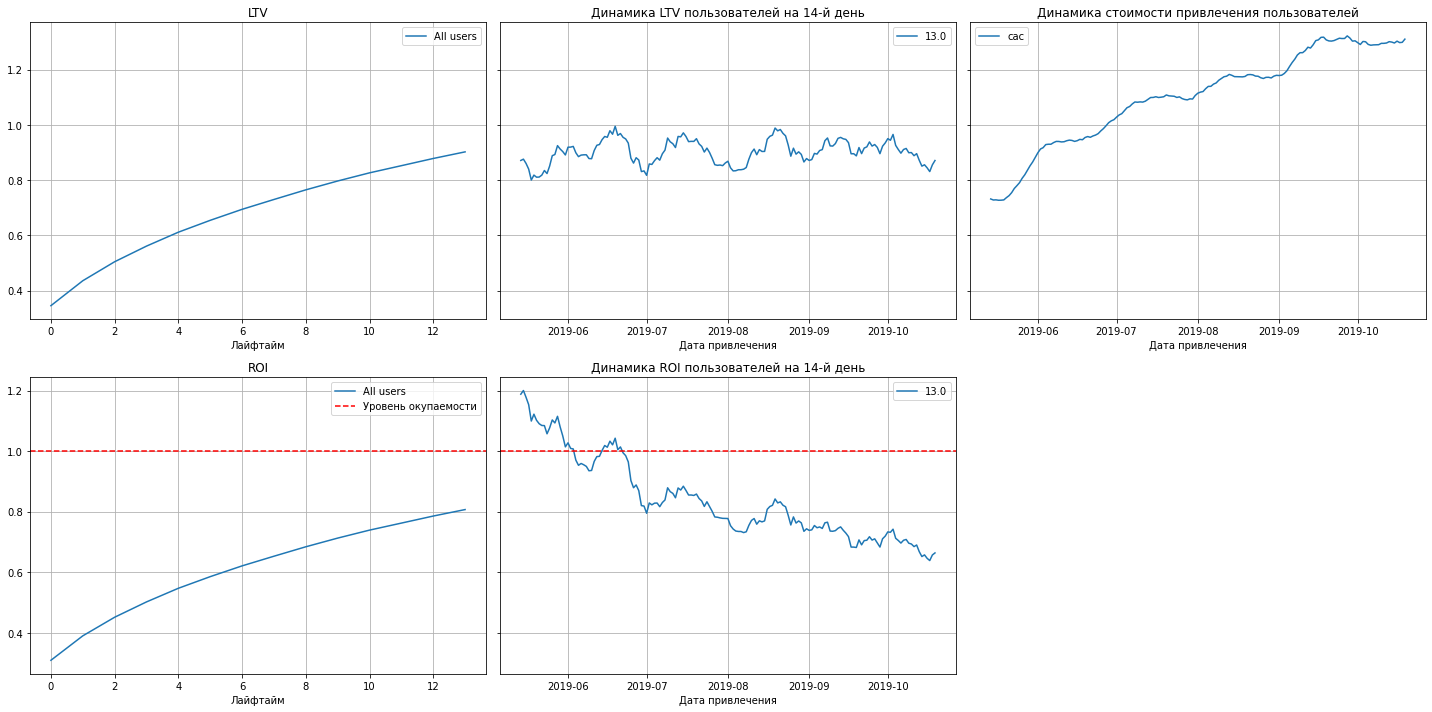

In [35]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_pay, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


#print('{}'.format(ltv_grouped[13][0]))
#a = ltv_history[13].reset_index()
#a[70:100]

Реальная окупаемость не соответствует заложенной в бизнес-плане: за 14 дней клиент окупается лишь на 80%.  
В динамике LTV пользователей на 14 день наблюдается сезонность, однако значения не выбиваются из диапазона 0.8-1.0.  
Стоимость привлечения пользователей стабильно увеличивается. При этом ROI пользователей на 14 день снижается, что свидетельствует о низкой эффективности рекламной компании.

***LTV, CAC, ROI по рекламным каналам***
<a id="channel_roi"></a>

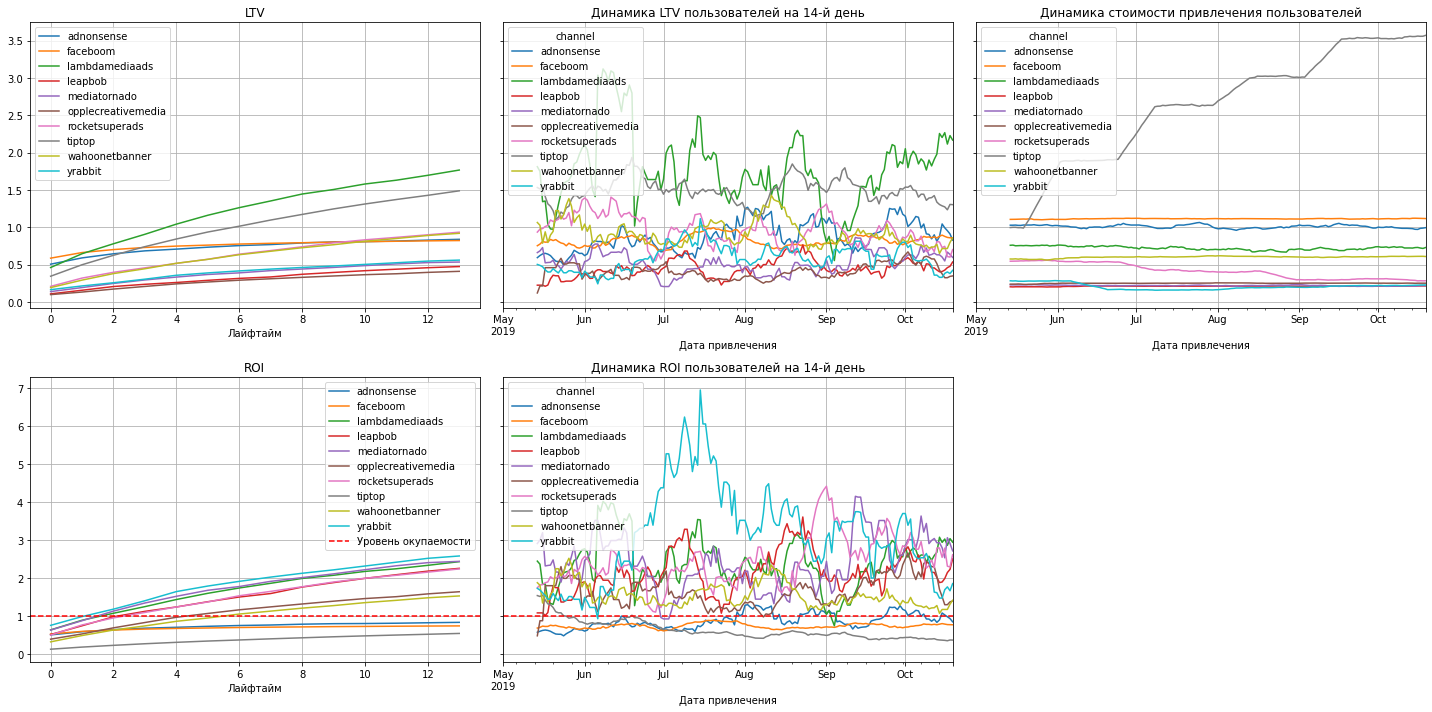

In [36]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_pay, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наибольшее значение LTV наблюдается у каналов lambdamediaads и tiptop. LTV других каналов не превышает единицы.  
Кривая динамики LTV lambdamediaads крайне нестабильна. В июне происходит значительный рост, но к июлю происходит откат до прежних значений. Во второй половине августа происходит сильное падение, после чего LTV восстанавливается в течении сентября.  
Кривая динамики LTV tiptop более стабильна, резкие перепады отсутствуют.  
Стоимость привлечения пользователей по каналу tiptop растает на протяжении всего рассматриваемого периода. Стоимость привлечения по другим каналам в целом стабильна и не превышает 1.1.  
Наибольшее ROI у канала yrabbit. Расходы на привлечение клиентов по каналам adnonsense, faceboom и tiptop в течение 14 дней не окупаются. Наименьшее ROI у канала tiptop.  
Высокие значения ROI yrabbit обусловлено резким ростом в июле до значения 7.0. Однако к сентябрю снижается до значения 1.9.
Дальнейшее снижение ROI для yrabbit грозит вывести данный канал из разряда окупаемых.

***LTV, CAC, ROI по странам***
<a id="region_roi"></a>

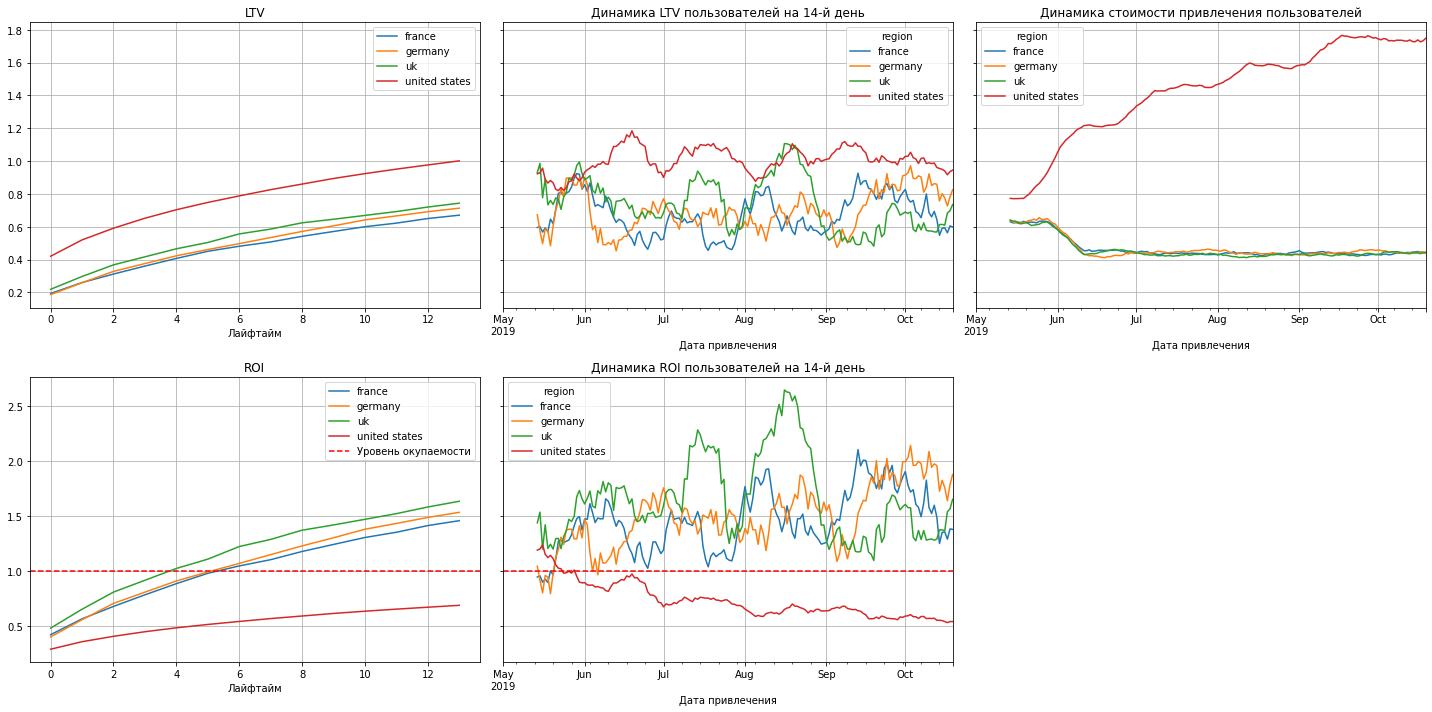

In [37]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_pay, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Наибольшее значение LTV наблюдается у трафика из США (до 1.0), наименьшее - из Франции (до 0.7).    
Стоимость привлечения пользователей из США возрастает на протяжении всего рассматриваемого периода. Стоимость привлечения по другим каналам в мае-июне снижается и далее стабильно держится на уровне 0.44.  
Наибольшее ROI у Соединенного Королевства Великобритании и Северной Ирландии - 1.7. Расходы на привлечение клиентов из США в течение 14 дней не окупаются - значение 0.6.  
В мае ROI США от ROI других стран отличается незначительно и имеет значение 1.75. Однако впоследствии наблюдается постепенное снижение, и в июне ROI США опускается ниже единицы, что свидетельствует о неэффективности рекламной компании.
ROI Европейских стран в рассматриваемый период несколько увеличивается, что на фоне снижения затрат на продвижение говорит об эффективности маркетинговой компании.

***LTV, CAC, ROI по устройствам***
<a id="device_roi"></a>

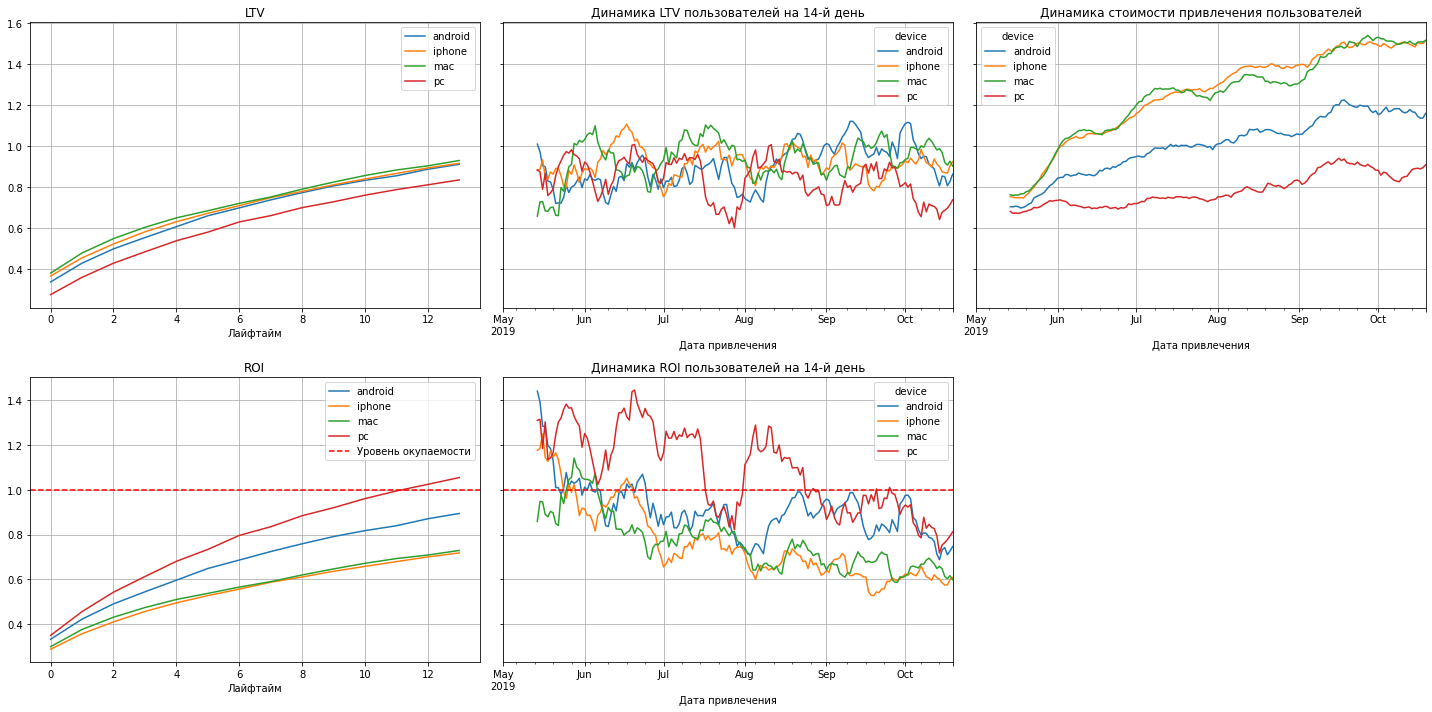

In [38]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_pay, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Наименьшее значение LTV среди устройств имеет pc - 0.81. Для остальных устройств LTV около 0.9.    
Стоимость привлечения увеличивается для всех устройств. Наибольший рост у iphone и mac. Наименьший - у pc. Не смотря на это расходы на привлечение клиентов окупаются только для устройств pc.
В рассматриваемый период для всех устройств, кроме android, ROI стабильно снижается: у android, после падения, с августа ROI стабилизируется в диапазоне 0.65-1.0. 
Значения ROI для iphone, mac и android опускается ниже единицы в июне, для pc - в августе.
В виду снижения ROI для pc, можно говорить о низком эффекте маркетинговой компании для данного устройства и прогнозировать его скорый переход в разряд неокупаемых.

***LTV, CAC, ROI по рекламным каналам для США***
<a id="channel_roi_usa"></a>

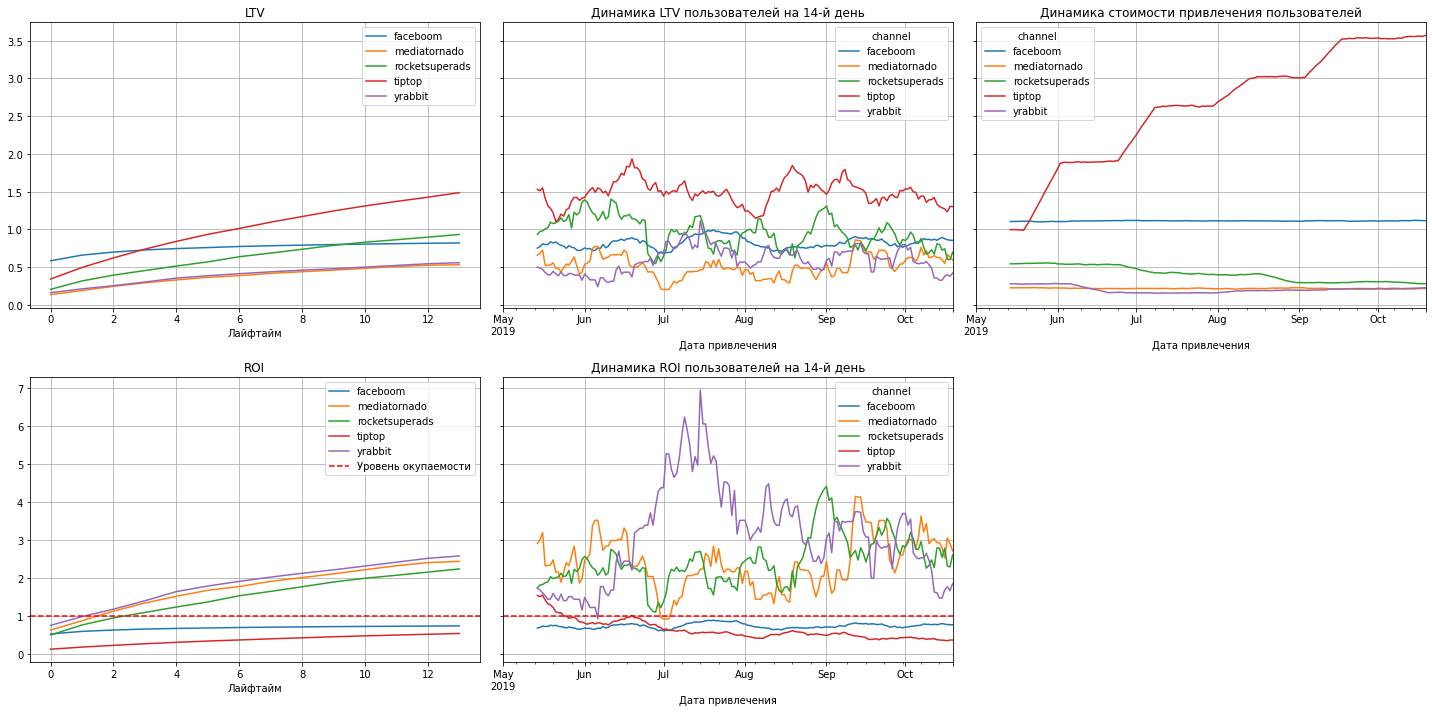

In [39]:
profiles_usa = profiles_pay.query('region == "united states"')

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наибольшее значение LTV у канала tiptop - 1.5, наименьшее у mediatornado и yrabbit - около 0.5. При наличие некоторой сезонности его значения превосходят показатели других каналов на протяжении всего рассматриваемого периода. При этом tiptop - единственный канал, для которого стабильно увеличивается стоимость привлечения пользователей.  
Однако по ROI tiptop вместе с mediatornado имеет худшие показатели - не окупаются.  
Стоит отметить аномальный всплеск значений ROI на 14 день лайфтайма у канала yrabbit в июне-июле.

***LTV, CAC, ROI по устройствам для США***
<a id="device_roi_usa"></a>

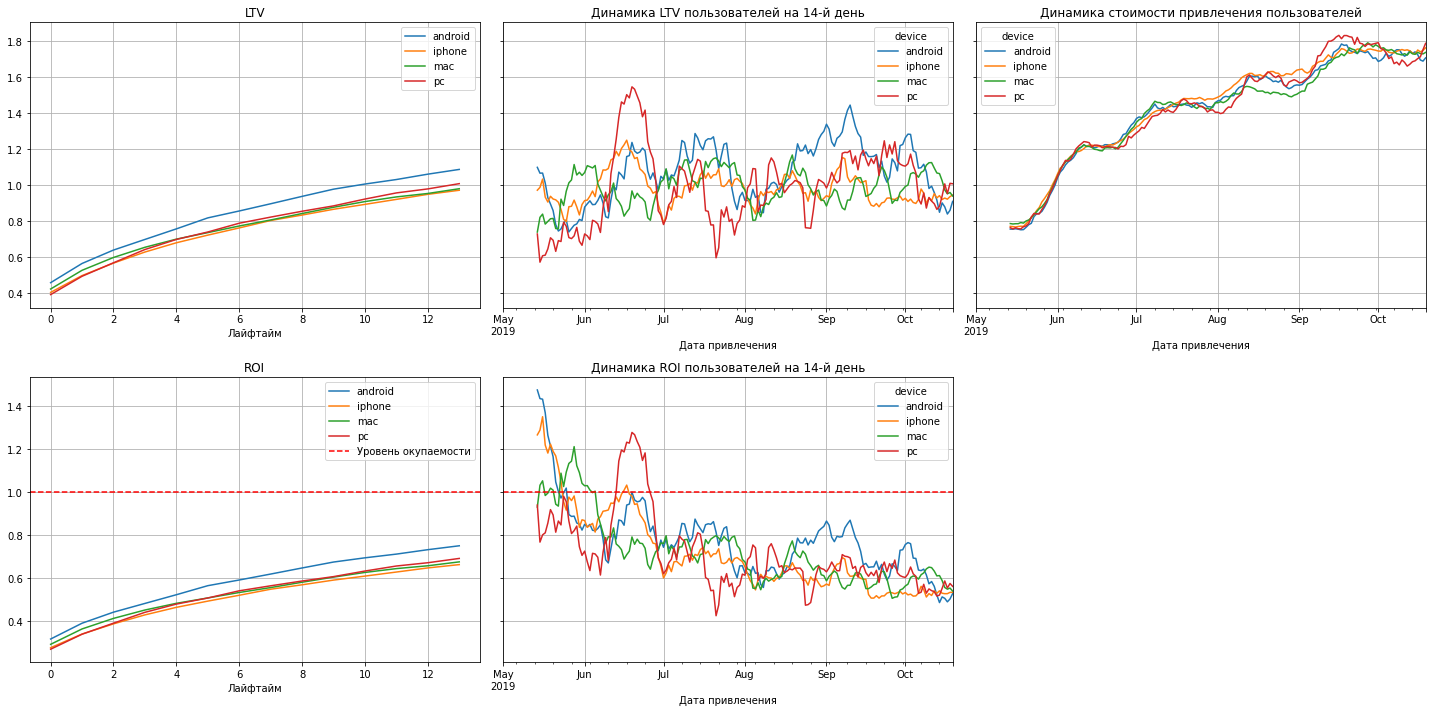

In [40]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наибольшее значение LTV у устройств android - 1.1. У других устройств - около 1.0.  
При том что затраты привлечение пользователей постоянно растут, маркетинговая компания не окупается: для каждого из устройств ROI не превышает 0.8.
На протяжении всего исследуемого периода ROI для всех устройств снижается.

***LTV, CAC, ROI по устройствам для проблемных каналов из США***
<a id="problem_channel_usa"></a>

LTV, CAC, ROI по устройствам для канала tiptop:

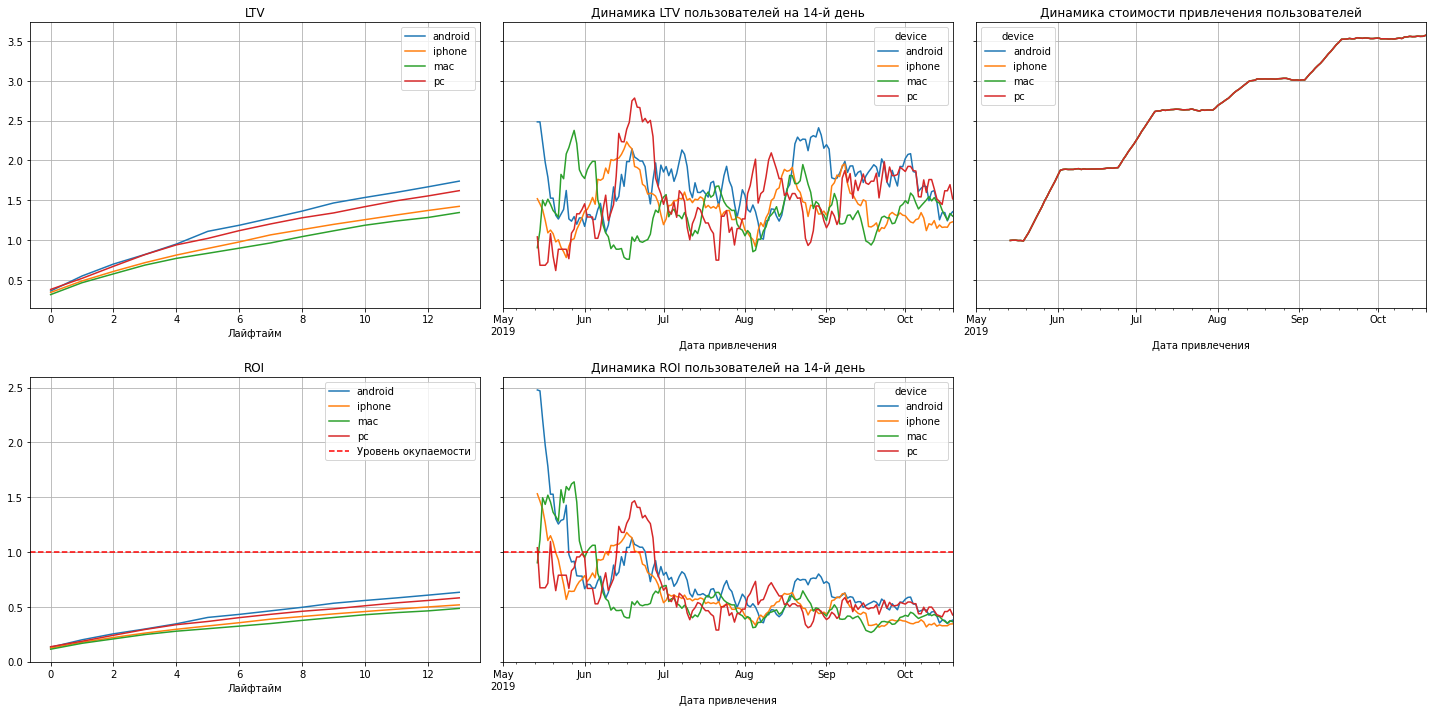

In [41]:
profiles_usa_tiptop = profiles_usa.query('channel == "tiptop"')
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa_tiptop, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наибольшее значение LTV у устройств android - 1.75. Наименьшее - у mac 1.4.  
При том, что за рассматриваемый период стоимость привлечения пользователей увеличивается в 3.5 раза, маркетинговая компания не окупается: для каждого из устройств ROI не превышает 0.7. На протяжении всего исследуемого периода ROI для всех устройств снижается.

LTV, CAC, ROI по устройствам для канала faceboom:

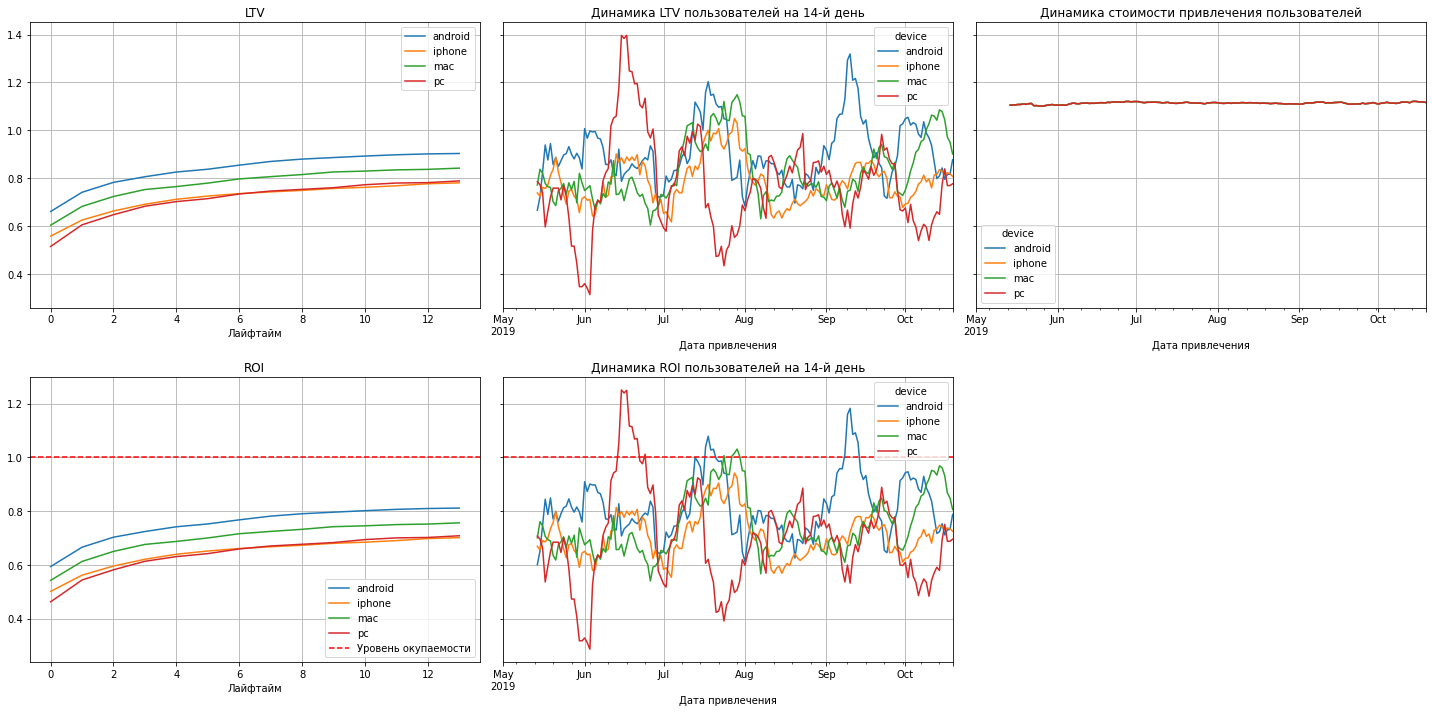

In [42]:
profiles_usa_faceboom = profiles_usa.query('channel == "faceboom"')
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa_faceboom, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наибольшее значение LTV у устройств android - 0.9. Наименьшее - у iphone и pc - 0.8.  
Стоимость привлечения пользователей неизменна на протяжении исследуемого периода. Затраты на привлечение пользователей не окупаются. На протяжении рассматриваемого периода ROI pc и android нестабильны, присутствует сезонность. При этом ROI для каждого из устройств имеет горизонтальный тренд.

***LTV, CAC, ROI по устройствам для по США без проблемных каналов***
<a id="no_problem_channel_usa"></a>

LTV, CAC, ROI по устройствам для канала tiptop:

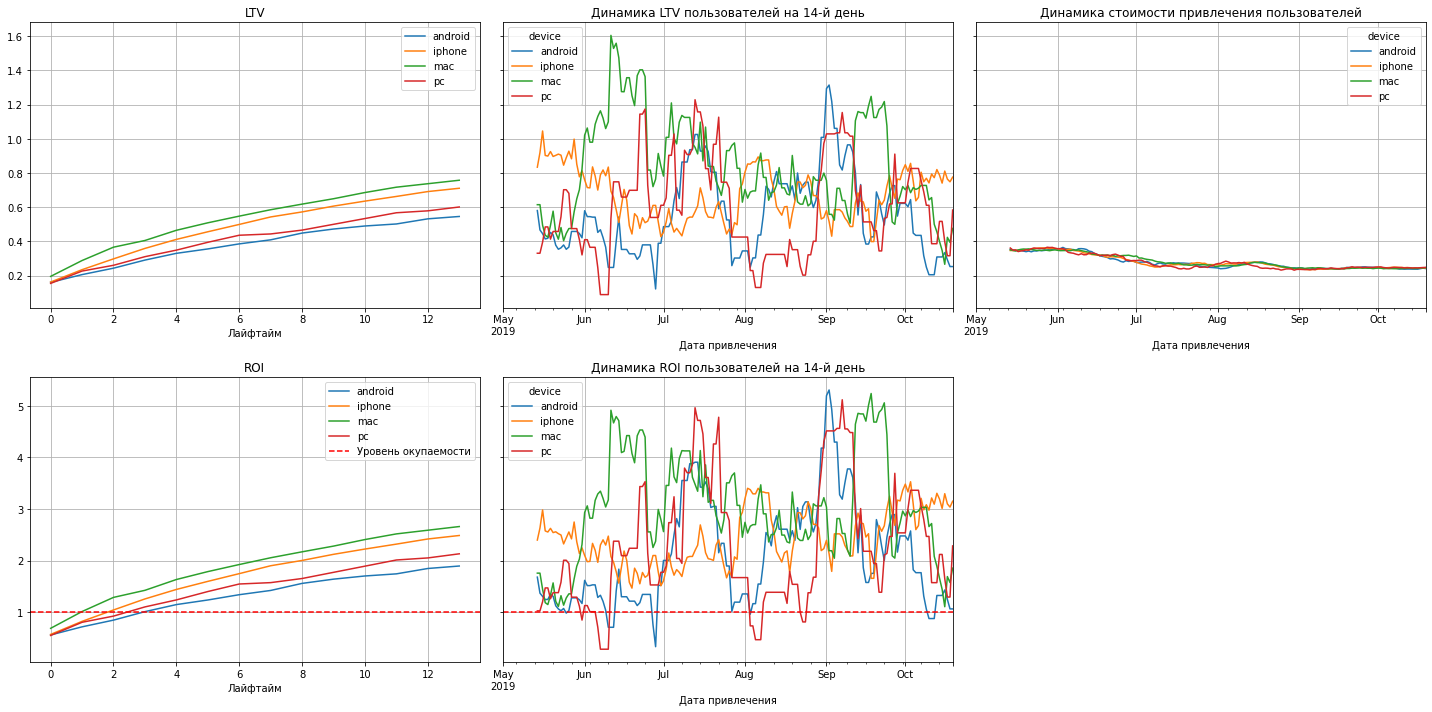

In [43]:
profiles_usa_good = profiles_usa.query('channel != "tiptop" and channel != "faceboom"')
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa_good, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Без учета проблемных каналов реклама для всех устройств окупается. При этом по окупаемости mac и iphone опережают pc и android, а стоимость привлечения пользователей снижается.

***LTV, CAC, ROI по рекламным каналам для Европы***
<a id="channel_roi_euro"></a>

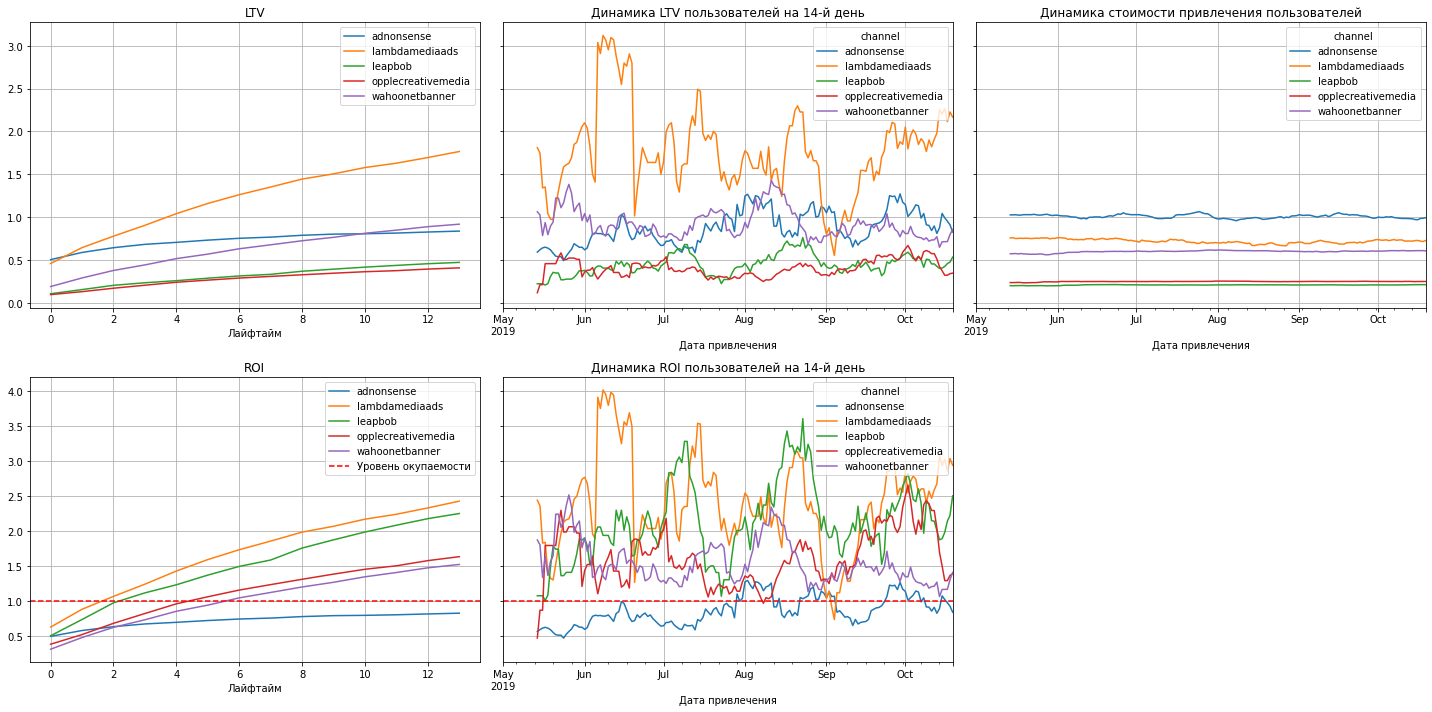

In [44]:
profiles_euro = profiles_pay.query('region != "united states"')

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_euro, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наибольшие значение LTV у канала lambdamediaads - 1.75. Значения LTV других каналов не превышает единицы. На протяжении рассматриваемого периода LTV канала lambdamediaads нестабильно, присутствует сезонность.
По окупаемости затрат на привлечение пользователям канал lambdamediaads является лидером.  Второе место по ROI занимает канал leapbob, при том, что по LTV он предпоследний.  
Канал adnonsense не окупается, при этом к августу значение его ROI выросло с 0.6 и стабилизировалось около значения 1.0.

***LTV, CAC, ROI по устройствам для Европы***
<a id="device_roi_euro"></a>

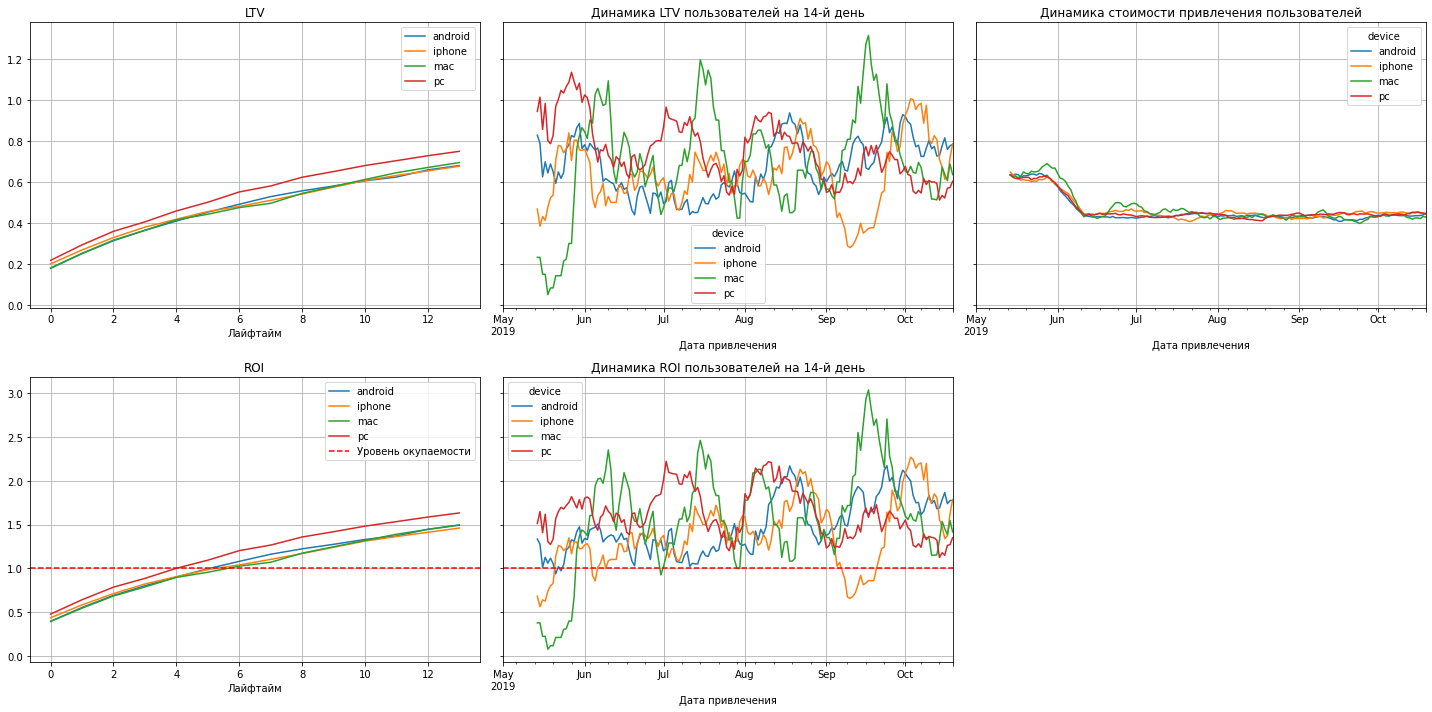

In [45]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_euro, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наибольшие значение LTV у pc - 1.75. Значения LTV для других устройств - 0.7.
В мае-июне наблюдается снижение стоимости привлечения пользователей по всем устройствам. В этот же период для mac и iphone наблюдается рост LTV выход ROI в зону окупаемости. В целом на протяжении рассматриваемого периода ROI каждого устройства держится в зоне окупаемости.

***Конверсия по рекламным каналам***
<a id="channel_conv"></a>

Общая конверсия рекламным каналам:

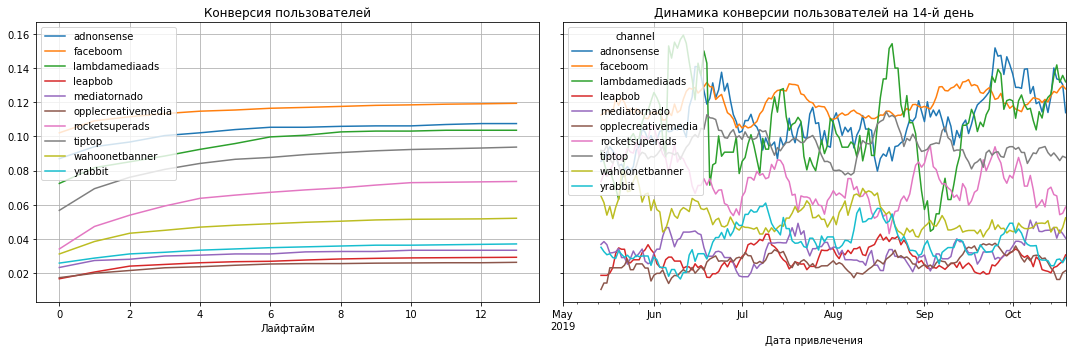

In [46]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_pay, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия по рекламным каналам США:

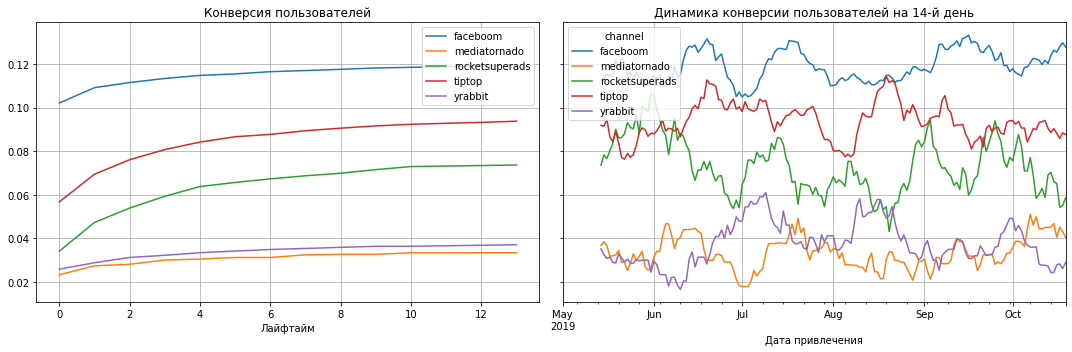

In [47]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия по рекламным каналам Европы:

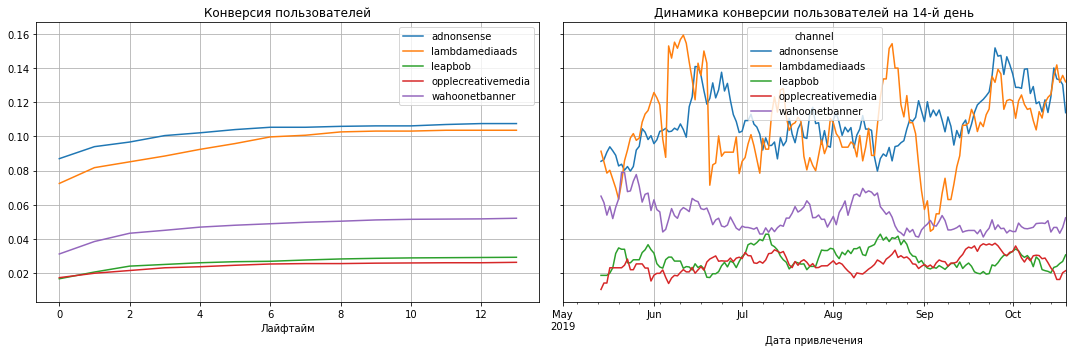

In [48]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_euro, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Наибольшее значение конверсии у каналов faceboom (США), adnonsense (Европа), lambdamediaads (Европа) - все в диапазоне 0.10-0.12. Наименьшие у opplecreativemedia (Европа), leapbob (Европа), mediatornado (США) и yrabbit (США) - все в диапазоне 0.02-0.04.    
Значение конверсии lambdamediaads за рассматриваемый период нестабильно: наблюдаются резкий рост и резкие снижения (середина июня и середина августа).  
На протяжении рассматриваемого периода на стабильно высоком уровне держится конверсия канала faceboom: 0.105-0.13.  
Для каждого из каналов не определяется ни восходящий, ни нисходящий тренд: значения конверсий колеблются в определенных диапазонах.

***Удержание по рекламным каналам***
<a id="channel_retention"></a>

Общее удержание по рекламным каналам:

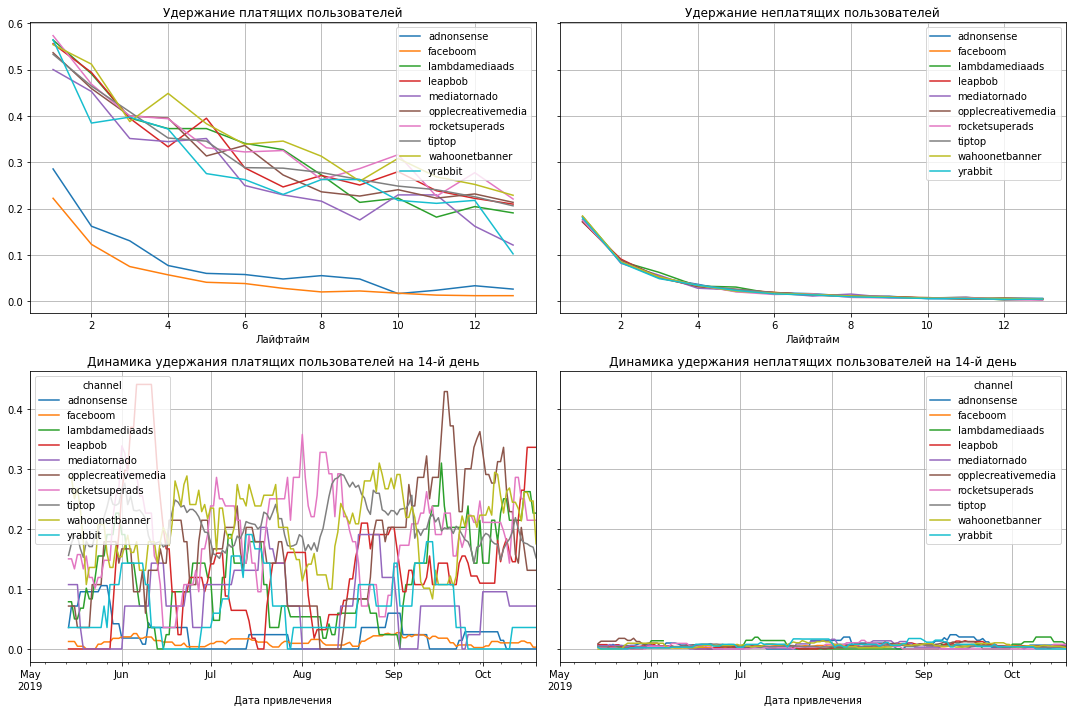

In [49]:
# смотрим удержание с разбивкой по источникам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_pay, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание по рекламным каналам США:

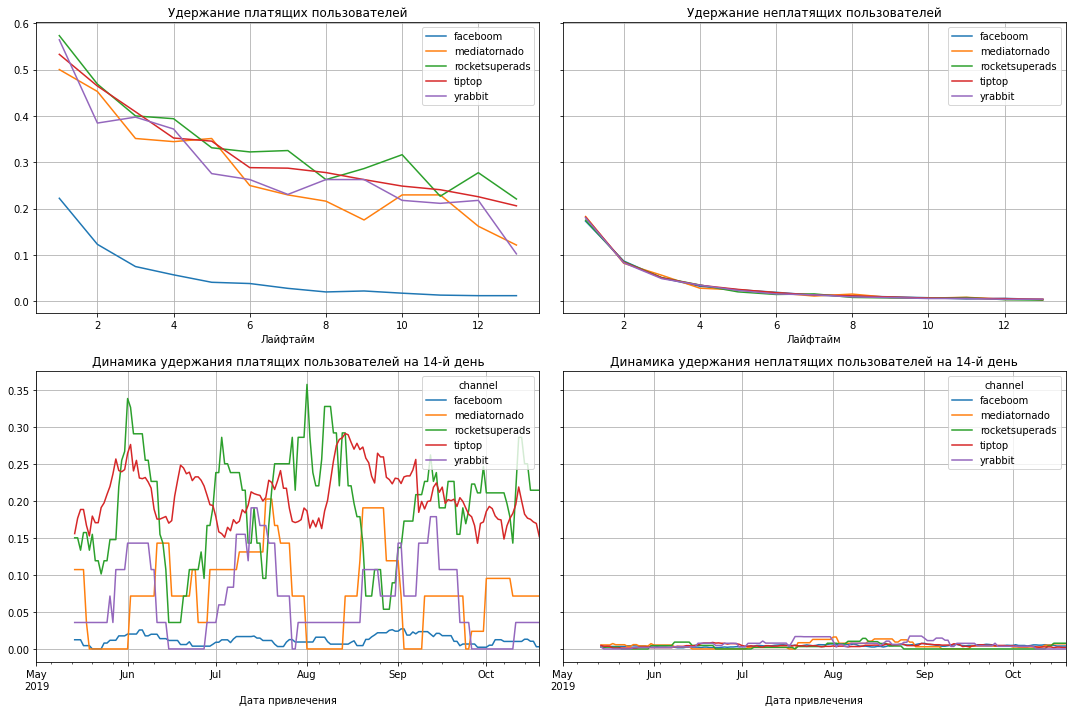

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание по рекламным каналам Европы:

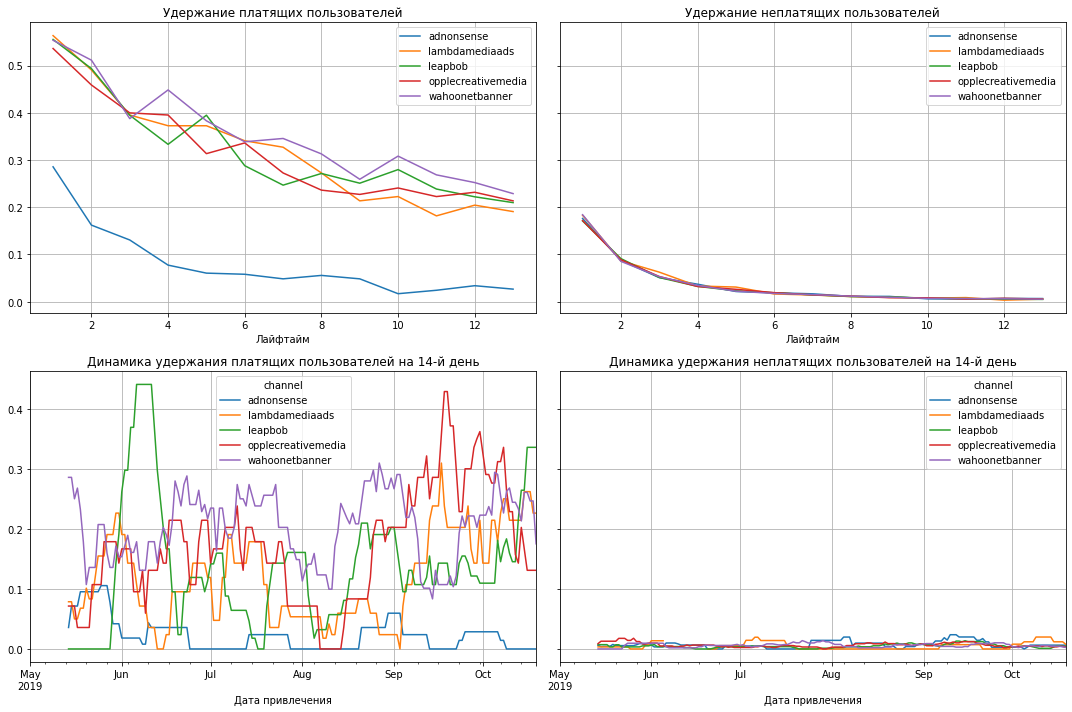

In [51]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_euro, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей из faceboom (США) и adnonsense (Европа) значительно ниже показателей удержания платящих пользователей из других каналов.  
Значения удержания неплатящих пользователей из разных каналов отличаются мало и близки к нулю уже на 8 день.

***Конверсия и удержание по странам***
<a id="region_conv"></a>

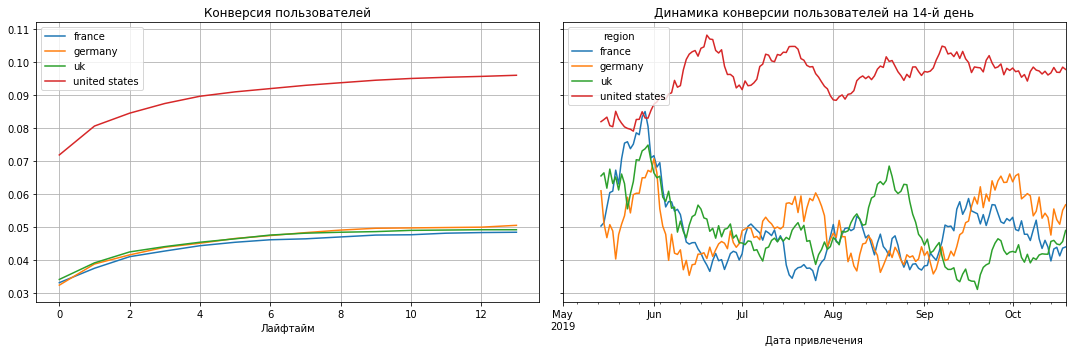

In [52]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_pay, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наибольшее значение конверсии у США - 0.96. Для пользователей из других стран значения держатся около 0.35-0.50.  
Конверсия для трафика США резко возрастает в с мая по середину июня. В дальнейшем значение колеблется около значения 1.0.  
Конверсия трафика из других стран растет в течение мая. Затем происходит падение, после чего значения колеблются в диапазоне 0.03-0.07.  
Конверсия трафика из США превышает конверсию трафика из каждой европейской страны в 19 раз.

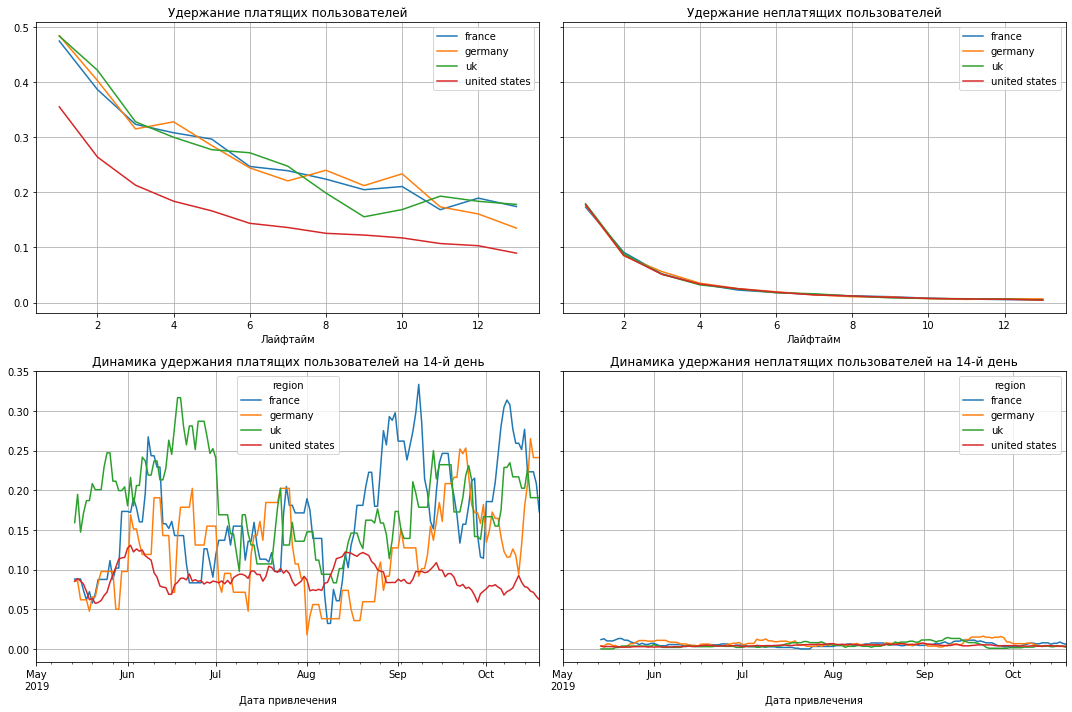

In [53]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_pay, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Наименьшее значение удержания платящих пользователей у США - 0.9.  
Значения удержания неплатящих пользователей из разных каналов отличаются мало и близки к нулю уже на 8 день. 

***Конверсия по устройствам***
<a id="device_conv"></a>

Общая конверсия по устройствам:

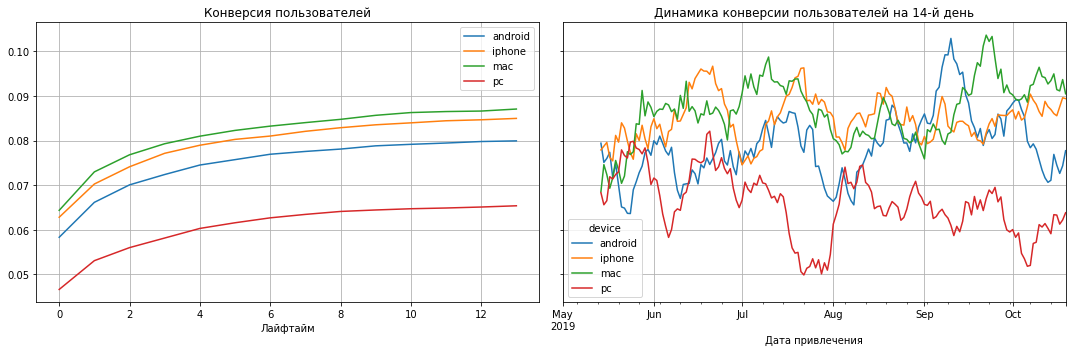

In [54]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_pay, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия по устройствам для США:

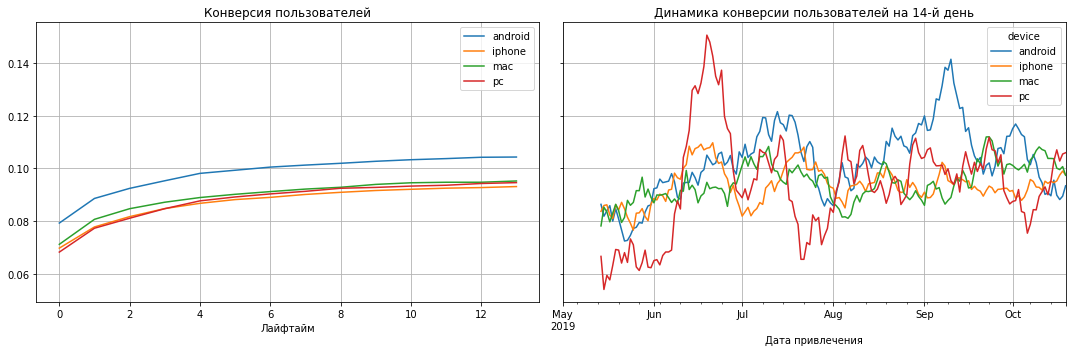

In [55]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия по устройствам для Европы:

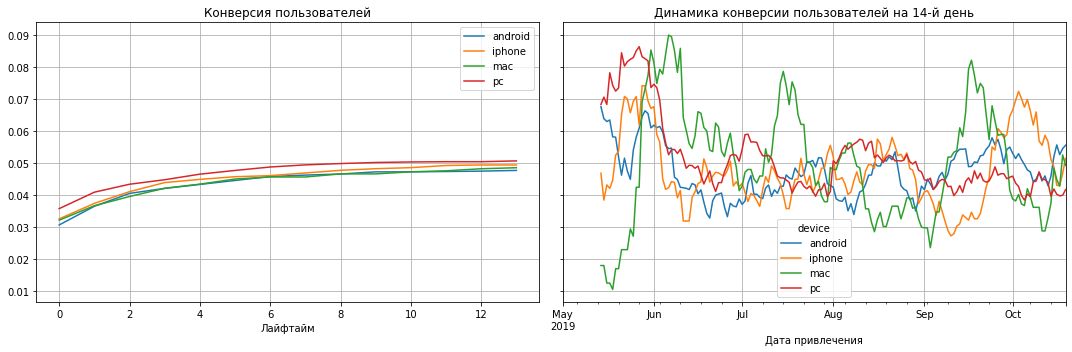

In [56]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_euro, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Наибольшее значение конверсии - у pc - 0.87. Наименьшее значение конверсии - у pc - 0.65.  
На протяжении рассматриваемого периода конверсия android несколько увеличивается, а pc - уменьшается.

***Удержание по устройствам***
<a id="device_retention"></a>

Общее удержание по устройствам:

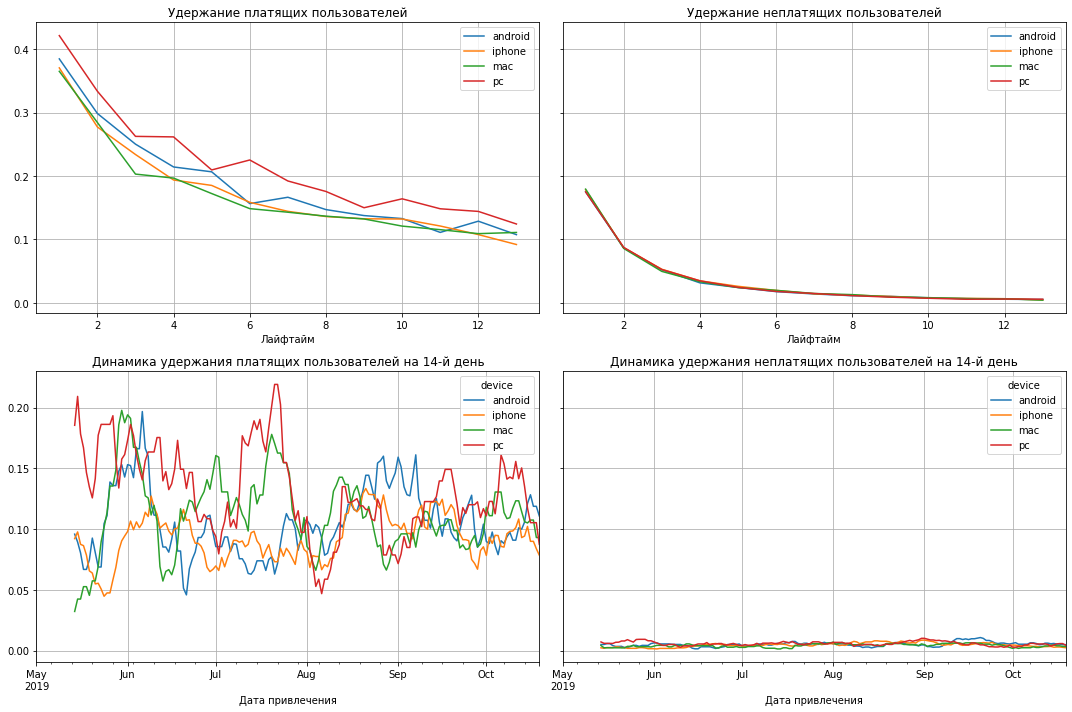

In [57]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_pay, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание по устройствам для США:

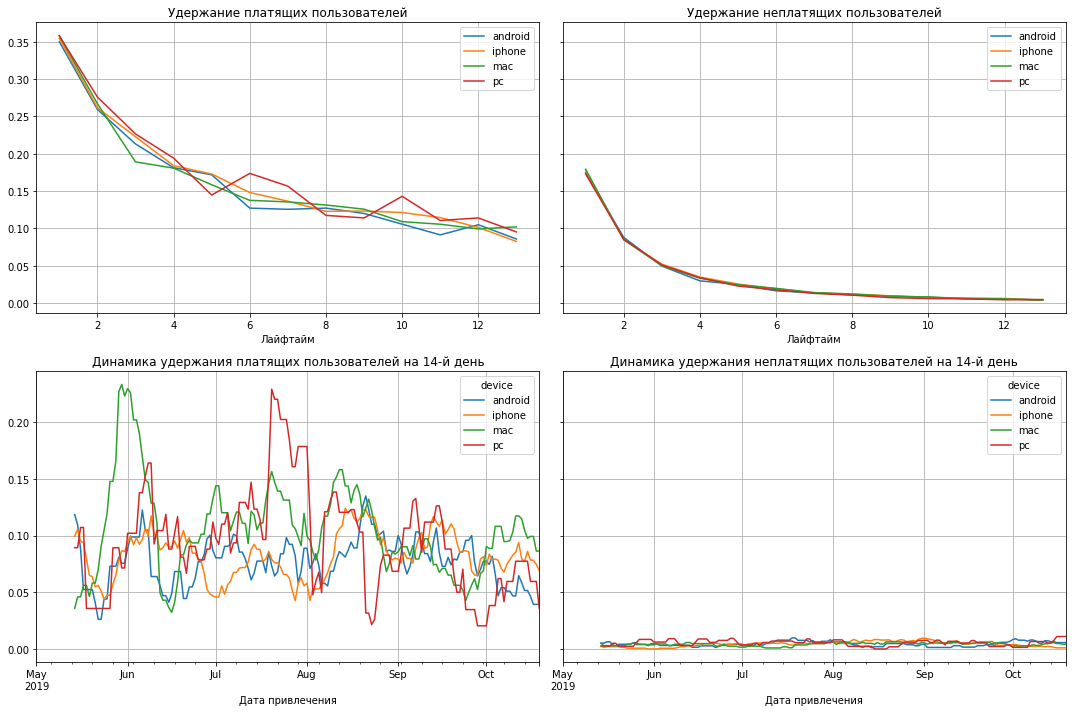

In [58]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание по устройствам для Европы:

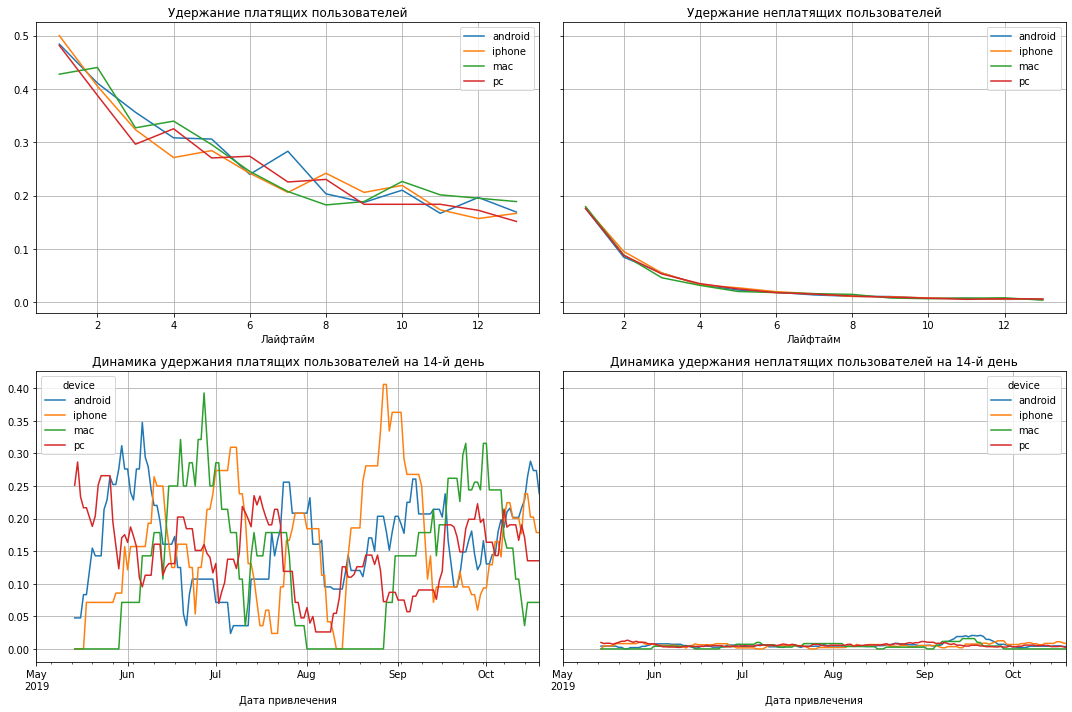

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_euro, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Динамика удержания платящих пользователей для всех устройств нестабильна до августа, далее амплитуда колебаний уменьшается.

***Трафик проблемных каналов по странам и устройствам***
<a id="bad_channel"></a>

Трафик tiptop по устройствам:

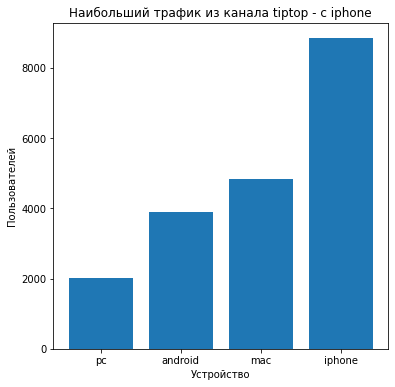

In [60]:
# строим гистограмму по устройствам
test_device = (
    profiles_usa_tiptop.groupby('device')
    .agg({'user_id' : 'nunique'})
    .rename(columns={'user_id' : 'count device'})
    .sort_values(by='count device')
)

plt.figure(figsize=(6,6))
ax = plt.bar(test_device.index, test_device['count device'])
plt.title('Наибольший трафик из канала tiptop - с iphone')
plt.ylabel('Пользователей')
plt.xlabel('Устройство')
plt.show()

Наибольший трафик из канала tiptop - с iphone.

Трафик faceboom по устройствам:

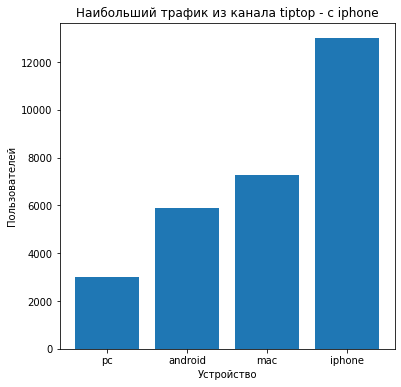

In [62]:
# строим гистограмму по устройствам
test_device = (
    profiles_usa_faceboom.groupby('device')
    .agg({'user_id' : 'nunique'})
    .rename(columns={'user_id' : 'count device'})
    .sort_values(by='count device')
)

plt.figure(figsize=(6,6))
ax = plt.bar(test_device.index, test_device['count device'])
plt.title('Наибольший трафик из канала tiptop - с iphone')
plt.ylabel('Пользователей')
plt.xlabel('Устройство')
plt.show()

Наибольший трафик из канала faceboom - с iphone.

***Вывод:***
<a id="fifth_conclusion"></a>
1. Общие итоги результаты маркетинговой компании:
При горизонте исследования в 14 дней маркетинговая компания в целом окупается лишь на 80%. Стоимость привлечения клиента возрастает на всем рассматриваем временном отрезке, однако LTV с течением времени не увеличивается: проявляя сезонность, находится в пределах диапазона 0.8-1.0. В результате происходит снижение ROI и в июне данный параметр окончательно покидает зону окупаемости.

2. Итоги результаты маркетинговой компании по США:
Маркетинговая компания по США окупается лишь на 70%. Значение LTV США выше, чем у европейских стран. При этом с течением времени оно не увеличивается, в отличие от стоимости привлечения пользователей: она увеличивается более чем в 2 раза.

3. Итоги результаты маркетинговой компании по Европе:
Маркетинговая компания в европейских странах окупаются на:
- Соединенное королевство – 165%;
- Германия – 155%;
- Франция – 150%;  
Стоимость привлечения клиентов в мае-июне несколько снижается и в дальнейшем держится на одном уровне.
В рассматриваемый период времени ROI Германии и Франции несколько возрастают. ROI Соединенного королевства нестабильно:  всплески в июле и августе.

4. Проблемные каналы США:

- tiptop
Маркетинговая компания по каналу tiptop окупается лишь на 50%. Стоимость привлечения по каналу tiptop в рассматриваемый период увеличивается в 3.5 раза. При этом, не смотря на высокое LTV и конверсию, увеличение затрат приводит лишь к уменьшению окупаемости: ROI tiptop уже с июня находится ниже границы окупаемости.
Итоги маркетинговой компании для канала tiptop не зависят от типа устройства, c которым пользуется потенциальный покупатель.

- faceboom
Маркетинговая компания по каналу faceboom окупается лишь на 70%. Стоимость привлечения по каналу faceboom в рассматриваемый период неизменна. LTV практически не увеличивается со второго дня лайфтайма, ROI не превышает границу окупаемости за весь исследуемый период времени.
Не смотря на максимальное значение конверсии среди каналов США, faceboom имеет минимальное значение удержания платящих пользователей.
- yrabbit
Маркетинговая компания по каналу yrabbit окупается на 260%. По величине LTV занимает предпоследнее место среди каналов США. Высокая окупаемость обусловлена всплеском ROI в июне-июле. С середины июля ROI постоянно снижается. При продолжении данной тенденции вскоре возможен уход ROI ниже границы окупаемости. Крайне низкое удержание платящих пользователей.

5. Проблемные каналы Европы:

- adnonsense  
Маркетинговая компания по каналу adnonsense окупается на 80%, при том, что стоимость привлечения клиентов среди европейских каналов максимальная. На протяжении рассматриваемого периода времени ROI канала увеличивается с 0.5 в мае до 1.0 в июле и закрепляется на данном значении.

6. Проблемные устройства:
По проблемным каналам tiptop и faceboom чаще всего приходят с устройств iphone и mac, что определяет низкую степень окупаемости для данных устройств.
 
8. Весь трафик канала tiptop и faceboom - из США, что определяет низкую степень окупаемости для данной страны. 
9. Наибольшее количество пользователей по каналу tiptop приходят с устройств iphone - 8840.
10. Наибольшее количество пользователей по каналу faceboom приходят с устройств iphone - 12996.

## Общий вывод
<a id="final"></a>

Общие сведения:
1.	Наибольшая доля платящих пользователей из США - 0.07.
2.	Платящие пользователи чаще пользуются устройствами:
   - mac - 0.063
   - iphone - 0.062
3.	Платящие пользователи чаще приходят из каналов:
   - faceboom (США) - 0.122;
   - adnonsense (Европа).- 0.11;
   - lambdamediaads (Европа) - 0.10;
   - tiptop (США) – 0.09;
4.	Наибольшие расходы приходятся на привлечение пользователей по каналам:
   - tiptop (США) - 54751.3;
   - faceboom (США) - 32445.6
5.	Наибольшая средняя стоимость пользователя у канала tiptop – 2.8.

Общие итоги маркетинговой компании:
1.	Общие итоги результаты маркетинговой компании: При горизонте исследования в 14 дней маркетинговая компания в целом окупается лишь на 80%. Стоимость привлечения клиента возрастает на всем рассматриваем временном отрезке, однако LTV с течением времени не увеличивается: проявляя сезонность, находится в пределах диапазона 0.8-1.0. В результате происходит снижение ROI и в июне данный параметр окончательно покидает зону окупаемости.
2.	Маркетинговая компания по США окупается лишь на 70%. Значение LTV США выше, чем у европейских стран. При этом с течением времени оно не увеличивается, в отличие от стоимости привлечения пользователей: стоимость увеличивается более чем в 2 раза.
3.	Маркетинговая компания в европейских странах окупаются на:
   - Соединенное королевство – 165%;
   - Германия – 155%;
   - Франция – 150%;  
   
Стоимость привлечения клиентов в мае-июне несколько снижается и в дальнейшем держится на одном уровне.

Проблемы маркетинговой компании:  
1.	Низкая эффективность рекламы по каналу tiptop (США).   
Наибольшие траты на привлечение пользователей приходятся на канал tiptop, стоимость клиента значительно выше этого параметра у других каналов. Наибольшее количество пользователей приходят из США, где один из основных источников трафика – канал tiptop. Соответственно, при высокой стоимости привлечения пользователей, окупаемость в 50% ведет к значительным убыткам.

2.	Низкая эффективность рекламы по каналу faceboom (США).  
Затраты на рекламу по данному каналу стабильно увеличиваются, при этом маркетинговая компания по каналу faceboom окупается лишь на 70%. Столь низкий результат связан с высокой стоимостью привлечения пользователей и крайне низким удержанием.

3.	Снижение ROI канала yrabbit (США).  
При том, что маркетинговая компания по каналу yrabbit окупается на 260%, ROI стабильно снижается с июля. При продолжении тенденции ROI в скором времени опустится ниже границы окупаемости.

4.	Низкая окупаемость рекламной компании по каналу adnonsense (Европа).  
Маркетинговая компания по каналу adnonsense окупается на 80%, при том, что для него стоимость привлечения клиентов среди европейских каналов максимальная.

5. Низкая окупаемость рекламных компаний для устройств mac и iphone.

***Рекомендации***
<a id="recom"></a>
1. Оптимизировать рекламу по каналу tiptop. В случае невозможности увеличения значения окупаемости - уменьшить затраты на данный канал до значений на май 2019 года и вернуться к рекламной концепции, действовавшей на тот момент: тогда ROI был выше границы окупаемости.
2. Оптимизировать рекламу по каналу faceboom. В случае невозможности увеличения значения окупаемости - прекратить рекламу по данному каналу.
3. Часть высвободившихся средств направить на рекламу по каналу adnonsense. Поскольку и без дополнительных вливаний в рекламу по данному каналу ROI в июле поднимается до границы окупаемости, то можно сделать вывод, что у пользователей adnonsense со временем появляется интерес к приложению. Дополнительная реклама может этот интерес подогреть.
4. Часть высвободившихся средств направить на рекламу по каналам rocketsuperads, mediatornado и yrabbit, чтобы компенсировать потери на рынке США. К тому же дополнительные вливания могут остановить снижение ROI канала yrabbit.
5. Оптимизировать рекламную компанию по каналам lambdamediaads (Европа) и leapbob (Европа). LTV и ROI данных каналов имеют большую амплитуду колебаний, а значит есть потанциал для роста: можно за счет уменьшения амплитуды подтянуть средние значения LTV и ROI к верхней границе диапазона колебаний. 
6. По той же причине оптимизировать рекламную компанию в Соединенном Королевстве.
7. По той же причине оптимизировать рекламную компанию для устройств mac.